Jupyter Notebook -traiteDataKMeans- Alexandre TABOT - Stagiaire Labo LIUM M2 Info ATAL -


solution 01
adresse site des td
https://hebdo.framapad.org/p/m2ataltd1


------------------------------------------------
import pandas as pd
pd.__version__

    **Its double underscore before and after the word "version".
 
---------------------------------------------------
notes 

commande installation des bibliotheques et autre

#pip install --upgrade pip
#!pip install mglearn



Importation des bibliotheques classiques Python

In [1041]:



%matplotlib inline

##import
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import scipy as sp
import IPython
import sklearn
import mglearn
import PIL
import graphviz

from scipy import sparse
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from PIL import Image as ImgPIL
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from cycler import cycler

#from mglearn.tools import discrete_scatter
#from mglearn.plot_2d_separator import plot_2d_classification
#from mglearn.plot_helpers import cm3

##import propres au projet
import string
import csv
import pickle
import argparse
import copy
import openpyxl
import xlrd
import xlwt
import xlsxwriter

from IPython.display import display
from sklearn.cluster import KMeans
from copy import deepcopy

from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict

##Telerchargement package
#nltk.download('stopwords')


print('Importation des bibliotheques : OK')



Importation des bibliotheques : OK


Bloc Fonctions

In [1042]:
def corpusStringToFloat(corpusString) :
    #Converti un corpus audioProsodie de un fichier vers une matrice corpus load corpusLoadTabDesAudio
    
    #Bibliotheques
    from copy import deepcopy
    
    #Variables
    corpusLoadTabDesAudio =[]
    listFeatF0 =[]
    listFeatMfcc =[]
    listFeatSpRa =[]
    listMfccMoy =[]
    listMfccStd =[]
    listMfccMax=[]
    listMfccMin = []
    listVectProsodie =[]
    floatFeatDuree =0.0
    nbDimTransforme = 4
    nbDimUnFeat = 1
    nbDimMfcc = 13
    nbVal = 61
    intIndiceDebut = 0
    intIndiceFin = 0
    intNbDecimale = 2
    
    #Corps
    for vecteur in corpusString :
        #Boucle de parcours de structure de donnees a 2 niveaux (dimension) classique en Machine Learning
        vectFloat=[]
        intIndiceDebut = 0
        intIndiceFin = 0
        for feature in vecteur :
            try :
                vectFloat.append(round(float(feature), intNbDecimale))
            except :
                print('feature-->', feature)
            
        #print('vectFloat-->', vectFloat)
        # Reconstruction des features
        intIndiceFin = intIndiceFin + nbDimTransforme
        listFeatF0 = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('listFeatF0-->', listFeatF0)
        intIndiceDebut = intIndiceFin
        intIndiceFin = intIndiceFin + nbDimMfcc
        listMfccMoy = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('listMfccMoy-->', listMfccMoy)
        intIndiceDebut = intIndiceFin
        intIndiceFin = intIndiceFin + nbDimMfcc
        listMfccStd = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('listMfccStd-->', listMfccStd)
        intIndiceDebut = intIndiceFin
        intIndiceFin = intIndiceFin + nbDimMfcc
        listMfccMax = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('listMfccMax-->', listMfccMax)
        intIndiceDebut = intIndiceFin
        intIndiceFin = intIndiceFin + nbDimMfcc
        listMfccMin = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('listMfccMin-->', listMfccMin)
        #print('intIndiceFin-->', intIndiceFin)
        #Reconstruction de la matrice de la feature des MFCC
        listFeatMfcc = deepcopy([listMfccMoy, listMfccStd, listMfccMax, listMfccMin])
        #print('listFeatMfcc-->', listFeatMfcc)
        intIndiceDebut = intIndiceFin
        intIndiceFin = intIndiceFin + nbDimTransforme
        listFeatSpRa = deepcopy(vectFloat[intIndiceDebut:intIndiceFin])
        #print('intIndiceFin-->', intIndiceFin)
        #print('listFeatSpRa-->', listFeatSpRa)
        #print('vectFloat-->',vectFloat)
        #Recuperation de la duree de parole
        floatFeatDuree = deepcopy(vectFloat[intIndiceFin])
        #print('floatFeatDuree-->',floatFeatDuree)
        #Reconctruction du vecteur de prosodie
        listVectProsodie = deepcopy([listFeatF0, listFeatMfcc, listFeatSpRa, floatFeatDuree])
        #print('listVectProsodie-->', listVectProsodie)
        #Ajout au corpus retourne
        corpusLoadTabDesAudio.append(deepcopy(listVectProsodie))
        #print('corpusLoadTabDesAudio-->', corpusLoadTabDesAudio)
        #sys.exit()	
    return corpusLoadTabDesAudio

In [1043]:
def corpusStringToArray(corpusString) :
    #Transforme un corpus save en string vers une array (pour kmeans)
    
    #Variables
    corpusLoadArray = []
    vectFloat=[]
    intNbDecimale = 2
    #Corps
    for vecteur in corpusString :
        #Boucle de parcours des niveaux du corpus
        vectFloat=[]
        for feature in vecteur :
            try :
                vectFloat.append(round(float(feature), intNbDecimale))
            except :
                print('featureInvalid-->', feature)
        #Ajout du vecteur transforme de float au corpus de retour de fonction
        corpusLoadArray.append(vectFloat)
    
    return corpusLoadArray

In [1044]:
def aplanirListMiltiDimToMonoDim(listMultiDim) :
    #Aplanit une liste
    
    #corps
    listPlate = sum(listMultiDim, [])
    return listPlate

In [1045]:
def retirerListeL2deListeL1(listL1, listL2) :
    #Renvoie une liste qui est la listL1 retirer des element de listL2
    
    #bibliotheques necessaires
    import copy
    from copy import deepcopy
    
    #variables de la fonction
    listDiff = deepcopy(listL1)
    
    #Corps de la fonction
    try :
        #essai sur liste de meme nombre de dimensions
        for elemSoustrait in listL2 :
            #Boucle de parcours des elements a retirer
            if elemSoustrait in listDiff :
                #Verification de la presence de element elemSoustrait pour le soustraire
                listDiff.remove(elemSoustrait)
            
    except :
        print('Erreur de cohereance de dimensions des parametres de la fonction retirerListeL2deListeL1')
        print('Retour liste vide')
        return []
    
    #retour de la fonction
    return listDiff

In [1046]:
def builtListSelectVectFromListCorpus(listCorpus, listIndicesSelectVect) :
    #Renvoie une liste de vecteurs selectionnes selon une liste de indices de vecteur a partir de un corpus
    
    #Bibliotheques
    import numpy as np
    from copy import deepcopy
    
    #Variables
    listVectSelect = []
    
    #Corps de la fonction
    for indiceVect in listIndicesSelectVect :
        #Boucle de parcours des indices de vecteurs selectionnes
        listVectSelect.append(listCorpus[indiceVect])
    
    return listVectSelect

In [1047]:
def builtCalibreArrayFromListCorpus(listCorpus, intCoteDimVect, intCoteDimMatrice, intPosFeature) :
    #Renvoie une array calibree de la feature en position intPosFeature du vecteur, a partir de une liste Corpus a 2 dimension
    
    #Bibliotheques
    import numpy as np
    from copy import deepcopy
    
    #Variables
    listVectCote = []
    listArrayCalibree = []
    intCptCoteVect = 0
    intNbMinKmeans = 2
    
    #Corps
    print("debut de la verification de la fonction builtCalibreArrayFromListCorpus")
    
    #Feature F0 : [:] [3] constituee de vecteur de 4 elements
    #Transfert de un nombre definit de elements pour le vecteur constitutif de array ( liste de vecteur)
    #Reinitialisation avant boucle
    for vectConstituant in listCorpus :
            #Reinitialisation avant boucle	
        intCptCoteVect =0 
        listVectCote = []
        
        #Traitement nature variable possible de vectConstituant
        #Cas vectConstituant est une seule valeur
        if(intCoteDimVect < intNbMinKmeans) :
            #Verification valeur unique du vecteur constituant
            #Ajout direct de la valeur a la liste calibree listArrayCalibree
            listArrayCalibree.append(deepcopy(vectConstituant[intPosFeature]))
        else :
            #Cas General taille vectConstituant > 1, vectConstituant est iterable
            for element in vectConstituant[intPosFeature] :
                #Boucle de transfert avec double verification
                #print('intCptCoteVect-->', intCptCoteVect)
                if intCptCoteVect <intCoteDimVect :
                    listVectCote.append(element)
                    intCptCoteVect += 1
                
                if intCptCoteVect == intCoteDimVect :
                    #print('Ajout de listVectCote a listArrayCalibree')
                    listArrayCalibree.append(deepcopy(listVectCote))
                    listVectCote =[]
                    intCptCoteVect = intCptCoteVect + 1
                
        
    npArrayCalibree = np.array(listArrayCalibree)
    #Verification finale du calibrage de array
    tupleDimArray = npArrayCalibree.shape
    print('tupleDimArray-->', tupleDimArray)
    
    #Traitement nature variable possible de vectConstituant
    
    #Cas Valeur Unique
    if(intCoteDimVect < intNbMinKmeans) :
        #Verification valeur unique du vecteur constituant
        if tupleDimArray[0] == intCoteDimMatrice :
            #Verification correspondance taille de matrice
            return npArrayCalibree
        else :
            print('Erreur de calibrage de la fonction builtCalibreArrayFromListCorpus, retour de liste vide ')
            print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
            print('tupleDimArray-->', tupleDimArray)
            return []
    else :
            #Cas General taille vectConstituant > 1
            if ( tupleDimArray[1] == intCoteDimVect and tupleDimArray[0] == intCoteDimMatrice) :
                #Verification correspondance taille de matrice
                print("Fin de la verification de la fonction builtCalibreArrayFromListCorpus")
        
                return npArrayCalibree
            else :
                print('Erreur de calibrage de la fonction builtCalibreArrayFromListCorpus, retour de liste vide ')
                print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
                print('tupleDimArray-->', tupleDimArray)
                return []

In [1048]:
def builtCalibreArrayFromMatrix3dCorpus(listCorpus, intCoteDimVect, intCoteDimMatrice, intPosFeature) :
    #Renvoie une array calibree de la feature en position intPosFeature du vecteur, a partir de une liste Corpus a 3 dimension
    
    #Bibliotheques
    import numpy as np
    from copy import deepcopy
    
    #Variables
    listVectCote = []
    listArrayCalibree = []
    intCptCoteVect = 0
    
    #Corps de la fonction
    
    #print('Debut de verification de la fonction builtCalibreArrayFromMatrix3dCorpus')
    
    #Feature MFCC : [:] [3] [12] constituee de matrice de 4 elements par 13 elements
    #Transfert de un nombre definit de elements pour le vecteur constitutif de array ( liste de vecteur)
    #Reinitialisation avant boucles
    for vectConstituant in listCorpus :
        #Reinitialisation avant boucle
        intCptCoteVect =0
        listVectCote = []
        for elementVect in vectConstituant[intPosFeature] :
            #niveau matrice 2d
            for element in elementVect :
                #Boucle de transfert avec double verification
                #print('intCptCoteVect-->', intCptCoteVect)
                if intCptCoteVect <intCoteDimVect :
                    listVectCote.append(element)
                    intCptCoteVect += 1
                
                if intCptCoteVect == intCoteDimVect :
                    #print('Ajout de listVectCote a listArrayCalibree')
                    listArrayCalibree.append(deepcopy(listVectCote))
                    listVectCote =[]
                    intCptCoteVect = intCptCoteVect + 1
                
            
        
    npArrayCalibree = np.array(listArrayCalibree)
    #Verification finale du calibrage de array
    tupleDimArray = npArrayCalibree.shape
    if ( tupleDimArray[1] == intCoteDimVect and tupleDimArray[0] == intCoteDimMatrice) :
        return npArrayCalibree
    else :
        print('Erreur de calibrage de la fonction builtCalibreArrayFromMatrix3dCorpus, retour de liste vide ')
        print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
        print('tupleDimArray-->', tupleDimArray)
        return []
    
    #print('Fin de verification de la fonction builtCalibreArrayFromMatrix3dCorpus')


In [1049]:
def builtFusionArrayCalibre(npArrayCalibreFirst, npArrayCalibreSecond, intCoteDimVect, intCoteDimMatrice) :
    #Renvoie une fusion calibree des array calibres
    
    #Bibliotheques necessaires
    import numpy as np
    from copy import deepcopy
    
    #Variables de la fonction
    listVectCote = []
    listArrayFusionCalibree = []
    intCptCoteVect = 0
    intCptCoteMatrice = 0
    intValeurMinDimVect = 2
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtFusionArrayCalibre')
    
    #Fusion des vecteurs constituants les deux array a fusionner
    # Verification de la concordonance des tailles des deux array
    tupleDimArrayFirst = npArrayCalibreFirst.shape
    tupleDimArraySecond = npArrayCalibreSecond.shape
    
    if (len(tupleDimArrayFirst)<intValeurMinDimVect) :
        #Verification npArrayCalibreFirst superieur a une dimension
        print('Erreur de taille minimale dimensionnelle de la fonction builtFusionArrayCalibre, inversion parametre')
        print('Retour de liste vide')
        return []
    
    #Traitement de nature des matrice numpy calibree npArrayCalibreSecond, ajout a matrice de grande dimension
    #Cas de valeur unique du vecteur constituant, non iterable
    if len(tupleDimArraySecond) < intValeurMinDimVect :
        #Cas de valeur unique du vecteur constituant, non iterable
        if ((tupleDimArrayFirst[1] + 1) != intCoteDimVect) :
            #Verification taille des deux type de vecteurs constitutifs
            print('Erreur sur somme de la fonction builtFusionArrayCalibre')
            print('Erreur sur somme des tailles vecteur constitutifs, intCoteDimVect')
            print('Retour de liste vide')
            return []
    else :
        #Cas general
        if ((tupleDimArrayFirst[1] + tupleDimArraySecond[1]) != intCoteDimVect) :
            #Verification taille des deux type de vecteurs constitutifs
            print('Erreur sur somme de la fonction builtFusionArrayCalibre')
            print('Erreur sur somme des tailles vecteur constitutifs, intCoteDimVect')
            print('Retour de liste vide')
            return []
        
    if ( tupleDimArrayFirst[0] != intCoteDimMatrice or tupleDimArraySecond[0] != intCoteDimMatrice ) :
        #Verification coherence des deux hauteurs de matrice
        print('Erreur de coherance de la fonction builtFusionArrayCalibre')
        print('Erreur de coherance de hauteur de matrice : hauteurs des deuc array a fusionner, sont differentes de intCoteDimMatrice ')
        print('retour de la liste vide')
        return []
    #Reinitialisation des variables avant boucle
    intCptCoteMatrice = 0
    for vectLignes in npArrayCalibreFirst :
        #Boucle parcours et concatenation des paires de vecteurs constitutifs
        #Reinitialisation
        listVectCote =[]
        intCptCoteVect = 0
        for element in vectLignes :
            #Boucle Parcours des elements des vecteurs constitutifs de npArrayCalibreFirst 
            #Boucle de transfert avec double verification
            #print('intCptCoteVect-->', intCptCoteVect)
            if intCptCoteVect <intCoteDimVect :
                listVectCote.append(element)
                intCptCoteVect += 1
            
            if intCptCoteVect == intCoteDimVect :
                #print('Ajout de listVectCote a listArrayFusionCalibree')
                listArrayFusionCalibree.append(deepcopy(listVectCote))
                listVectCote =[]
                intCptCoteVect = intCptCoteVect + 1
            
        #Traitement de nature des matrice numpy calibree npArrayCalibreSecond, ajout a matrice de grande dimension
        #Cas de valeur unique du vecteur constituant, non iterable
        if len(tupleDimArraySecond) < intValeurMinDimVect :
            #Cas de valeur unique du vecteur constituant, non iterable
            #Ajout valeur unique a liste listVectCote qui est le vecteur constituant de listArrayFusionCalibree
            if intCptCoteVect <intCoteDimVect :
                listVectCote.append(npArrayCalibreSecond[intCptCoteMatrice])
                intCptCoteVect += 1
            
            if intCptCoteVect == intCoteDimVect :
                #print('Ajout de listVectCote a listArrayFusionCalibree')
                listArrayFusionCalibree.append(deepcopy(listVectCote))
                listVectCote =[]
                intCptCoteVect = intCptCoteVect + 1
            
        else :
            for element in npArrayCalibreSecond[intCptCoteMatrice] :
                #Boucle Parcours des elements des vecteurs constitutifs de npArrayCalibreSecond
                #Boucle de transfert avec double verification
                #print('intCptCoteVect-->', intCptCoteVect)
                if intCptCoteVect <intCoteDimVect :
                    listVectCote.append(element)
                    intCptCoteVect += 1
                
                if intCptCoteVect == intCoteDimVect :
                    #print('Ajout de listVectCote a listArrayFusionCalibree')
                    listArrayFusionCalibree.append(deepcopy(listVectCote))
                    listVectCote =[]
                    intCptCoteVect = intCptCoteVect + 1
                
    npArrayFusionCalibree = np.array(listArrayFusionCalibree)
    #Verification finale du calibrage de array
    tupleDimArrayFusion = npArrayFusionCalibree.shape
    print('tupleDimArrayFusion-->', tupleDimArrayFusion)
    if (tupleDimArrayFusion[1] == intCoteDimVect and tupleDimArrayFusion[0] == intCoteDimMatrice) :
        return npArrayFusionCalibree
    else :
        print('Erreur de calibrage de la fonction builtFusionArrayCalibre, retour de liste vide ')
        print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
        print('tupleDimArrayFusion-->', tupleDimArrayFusion)
        return []
    
    #print('Fin de la verification de la fonction builtFusionArrayCalibre')
    
    return npArrayFusionCalibree

In [1050]:
def builtFusionArrayList1dCalibre(npArrayCalibreFirst, list1dCalibreSecond, intCoteDimVect, intCoteDimMatrice) :
    #Renvoie une fusion calibree de l array et de la liste calibres
    
    #Bibliotheques necessaires
    import numpy as np
    from copy import deepcopy
    
    #Variables de la fonction
    listVectCote = []
    listArrayFusionCalibree = []
    intCptCoteVect = 0
    intCptCoteMatrice = 0
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtFusionArrayList1dCalibre')
    
    return []

In [1051]:
def builtFusionCorpusList(listCorpusBase, listCorpusAjout) :
    #Renvoie la fusion de deux liste corpus de deux dimensions en ajoutant les lignes de une a suite de celles de autre
    
    #Variable de la fonction
    listFusionCorpus = []
    #Corps de la fonction
    try :
        #Fusion basique arithmetiques
        listFusionCorpus = listCorpusBase + listCorpusAjout
    except :
        #Double boucle
        try :
            for lineBase in listCorpusBase :
                #Boucle premier corpus
                listFusionCorpus.append(lineBase)
            for lineAjout in listCorpusAjout :
                #Boucle ajout second corpus
                listFusionCorpus.append(lineAjout)
        except :
            print('Erreur boucle ajout de la fonction builtFusionCorpusList')
            print('retour liste vide')
            return []
    
    #Retour de la fonction
    return listFusionCorpus

In [1052]:
def builtSelectVectFeatArrayCalibree(npArrayCalibreCorpus, listIndSelectVect, listIndSelectFeat) :
    #Renvoie la matrice des vecteurs seleactionnes de features selectionnees
    
    #Bibliotheques necessaires
    import numpy as np
    
    #Variables de la fonctions
    listSelectVectFeatCalibre = []
    vectSelectFeat = []
    intValeurMinDimVect = 2 # Nb valeurs minimal pour que constituants du vecteur soit iterable
    
    #Corps de la fonction
    #print("Debut verification de la fonction builtSelectVectFeatArrayCalibree")
    
    #Verification nullite des parametres
    if(npArrayCalibreCorpus == [] or listIndSelectVect == [] or listIndSelectFeat == []) :
        print('npArrayCalibreCorpus-->', npArrayCalibreCorpus)
        print('listIndSelectVect-->', listIndSelectVect)
        print('listIndSelectFeat-->', listIndSelectFeat)
        print('Erreur de parametres nuls de la fonction builtSelectVectFeatArrayCalibree, retour de la liste nulle')
        return []
    #Verification coherence des tailles des elements parametres de la fonction
    tupleDimArrayCalibreCorpus = npArrayCalibreCorpus.shape
    #Taille longueur matrice array
    #Taille du vecteur interne de features, nb de features selectionnees
    intCoteDimVect = len(listIndSelectFeat)
    #Taille largeur matrice array
    #Taille de la liste des vecteurs, nb de vecteurs selectionnes
    intCoteDimMatrice = len(listIndSelectVect)
    
    #Verification vecteur constituant a valeur unique
    if (len(tupleDimArrayCalibreCorpus) < intValeurMinDimVect) :
        #Cas de valeur unique du vecteur constituant, non iterable
        if(tupleDimArrayCalibreCorpus[0] < intCoteDimMatrice) :
            print('Erreur de coherance de taille des parametres de la fonction builtSelectVectFeatArrayCalibree')
            print('as de valeur unique du vecteur constituant, non iterable')
            print('retour de liste vide ')
            print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
            print('tupleDimArrayCalibreCorpus-->', tupleDimArrayCalibreCorpus)
            return []
        #Ajout de la valeur unique constituante
        for indSelectVect in listIndSelectVect :
            #Boucle de parcours des indices des vecteurs selectionnes
            #Ajout de la valeur unique a la liste des vecteurs de features selectionnes
            listSelectVectFeatCalibre.append(npArrayCalibreCorpus[indSelectVect])
            
    else :
        #Cas general, vecteur constituant iterable
        if (tupleDimArrayCalibreCorpus[1] < intCoteDimVect  or tupleDimArrayCalibreCorpus[0] < intCoteDimMatrice) :
            print('Erreur de coherance de taille des parametres de la fonction builtSelectVectFeatArrayCalibree')
            print('retour de liste vide ')
            print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
            print('tupleDimArrayCalibreCorpus-->', tupleDimArrayCalibreCorpus)
            return []
        #Ajout du vecteur constituant
        for indSelectVect in listIndSelectVect :
            #Boucle de parcours des indicices selectionnes des vecteur')
            #Reinitialisation
            vectSelectFeat = []
            for indSelectFeat in listIndSelectFeat :
                #Boucle de parcours des features selectionnees et ajout au vecteur constituant vectSelectFeat')
                vectSelectFeat.append(npArrayCalibreCorpus[indSelectVect][indSelectFeat])
            #Ajout du vecteur constituant a la liste des vecteurs de features selectionnes
            listSelectVectFeatCalibre.append(vectSelectFeat)
            #print('listSelectVectFeatCalibre-->', listSelectVectFeatCalibre)
        
    #Transformation liste 2D Finale en numpy matrice    
    npArraySelectVectFeatCalibre = np.array(listSelectVectFeatCalibre)
    #Verification finale des tailles
    tupleDimMatSelVectFeatCal = npArraySelectVectFeatCalibre.shape
    #print('tupleDimArraySelectVectFeat-->', tupleDimArraySelectVectFeat)
    
    #Verification vecteur constituant a valeur unique
    if (len(tupleDimArrayCalibreCorpus) < intValeurMinDimVect) :
        #Cas de valeur unique du vecteur constituant, non iterable
        if(tupleDimMatSelVectFeatCal[0] == intCoteDimMatrice) :
            return npArraySelectVectFeatCalibre
        else :
            print('Erreur de calibrage de la fonction builtSelectVectFeatArrayCalibree, retour de liste vide ')
            print('Cas de valeur unique du vecteur constituant, non iterable')
            print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
            print('tupleDimMatSelVectFeatCal-->', tupleDimMatSelVectFeatCal)
            return []
    else :
        #Cas general, vecteur constituant iterable
        if (tupleDimMatSelVectFeatCal[1] == intCoteDimVect and tupleDimMatSelVectFeatCal[0] == intCoteDimMatrice) :
            return npArraySelectVectFeatCalibre
        else :
            print('Erreur de calibrage de la fonction builtSelectVectFeatArrayCalibree, retour de liste vide ')
            print('intCoteDimVect, intCoteDimMatrice-->', intCoteDimVect, intCoteDimMatrice)
            print('tupleDimMatSelVectFeatCal-->', tupleDimMatSelVectFeatCal)
            return []
    
    #print('Fin de la verification de la fonction builtSelectVectFeatArrayCalibree')
    
    return npArraySelectVectFeatCalibre

In [1053]:
def builtListIndVectParolePers(corpusPers, intPosIdPers, idPers, boolCorespStrict) :
    #Renvoie la liste des indices de paroles de IdPers dans le corpus corpusPers des paroles de tous les personnages
    
    #Variables de la fonction
    intCptIdVect = 0
    listIndParolePers = []
    idPersCourant = ''
    boolSameStrict = True
    
    #Corps de la fonction
    #Verification des parametres de la fonction
    try :
        idPersCourant = corpusPers[0][intPosIdPers]
        boolSameStrict = bool(boolCorespStrict)
    except :
        print('Erreur de parametres intPosIdPers de la fonction builtListIndVectParolePers, retour liste vide')
        return []
    #Reinitialisation des variables avant boucle
    intCptIdVect = 0
    for vecteurFeat in corpusPers :
        #Boucle de parcours des vecteurs paroles
        idPersCourant = corpusPers[intCptIdVect][intPosIdPers]
        #Verification correspondance idPers pour ajout a liste indice des paroles du personnage idPers avec ou sans
        #correspondance stricte donnee par parametre boolCorespStrict
        if (((idPers in idPersCourant) and not(boolSameStrict)) or ((idPersCourant == idPers) and boolSameStrict)) :
            listIndParolePers.append(intCptIdVect)
        
        intCptIdVect += 1
    
    return listIndParolePers
    

In [1054]:
def builtCorpusRegroupePersDesacord(corpusLabelPers, intPosIdPers, strIdFauxPersDesacord) :
    #Renvoie un corpus de label de personnage en supprimant les desacord annotations a cause de strIdFauxPersDesacord
    
    #Variables de la fonction
    corpusLabelPersSansDesacord = []
    strPersModif = 'pers'
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtCorpusRegroupePersDesacord')
    
    #Verification des parametres de la fonction
    if (corpusLabelPers == []) :
        print('Corpus vide en parametre de la fonction builtCorpusRegroupePersDesacord, retour de la liste vide')
        return []
    
    try :
        #Verification donnees au bon format
        #Initialisation avant boucle
        corpusLabelPersSansDesacord = corpusLabelPers
        
        for vecteurLabelPers in corpusLabelPersSansDesacord :
            #Boucle de parcours des vecteurs constitutifs du corpus
            #Reconstruction du personnage de regroupement
            strPersModif = vecteurLabelPers[intPosIdPers].split(strIdFauxPersDesacord)[0]
            #Application de la modification
            vecteurLabelPers[intPosIdPers] = strPersModif
        
    except :
        print('Erreur de format de donnees de la fonction builtCorpusRegroupePersDesacord, retour de la liste vide')
        return []
    
    return corpusLabelPersSansDesacord

In [1055]:
def builtCorpusRegroupePers1EnPers2(corpusLabelPers, intPosIdPers, idPers1, idPers2) :
    #Renvoie un corpus de label de personnages en regroupant le personnage idPers1 dans le personnage idPers2
    
    #Variables de la fonction
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtCorpusRegroupePers1EnPers2')
    
    #Verification des parametres de la fonction
    if (corpusLabelPers == []) :
        print('Corpus vide en parametre de la fonction builtCorpusRegroupePers1EnPers2, retour de la liste vide')
        return []
    
    try :
        #Verification donnees au bon format
        
        for vecteurLabelPers in corpusLabelPers :
            #Boucle de parcours des vecteurs constitutifs du corpus
            if(idPers1 in vecteurLabelPers[intPosIdPers]) :
                #Verification presence personnage cible
                #Application de la substitution
                vecteurLabelPers[intPosIdPers] =  idPers2
        
    except :
        print('Erreur de format de donnees de la fonction builtCorpusRegroupePers1EnPers2, retour de la liste vide')
        return []
    
    return corpusLabelPers   

In [1056]:
def builtCorpusGroupePersEtNonPers(corpusLabelPers, intPosIdOeuvre, intPosIdPers, idPers, idNonPers, strMonoOrMulti) :
    #Renvoie un corpus de label de personnages en groupant les personnage idPers et les personnages non idPers
    #dans deux groupes distincts sur un ensemble groupe a partir de un monocorpus ou multicorpus
    
    #Variables de la fonction
    strMultiCorpus ='multi'
    strOeuvresGroupees = 'groupe_ensemble'
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtCorpusGroupePersEtNonPers')
    
    #Verification des parametres de la fonction
    if (corpusLabelPers == []) :
        print('Corpus vide en parametre de la fonction builtCorpusGroupePersEtNonPers, retour de la liste vide')
        return []
    
    try :
        #Verification donnees au bon format
        
        for vecteurLabelPers in corpusLabelPers :
            #Boucle de parcours des vecteurs constitutifs du corpus
            if (strMonoOrMulti == strMultiCorpus):
                #Verfication si le traitement de la fonction se fait sur plusieurs corpus regroupes
                vecteurLabelPers[intPosIdOeuvre] = strOeuvresGroupees
            #Niveau personnages
            if(idPers in vecteurLabelPers[intPosIdPers]) :
                #Verification presence personnage cible
                #Application du groupement au Groupe idPers
                vecteurLabelPers[intPosIdPers] =  idPers
            else :
                #Application du groupement au Groupe idNonPers
                vecteurLabelPers[intPosIdPers] =  idNonPers
        
    except :
        print('Erreur de format de donnees de la fonction builtCorpusGroupePersEtNonPers, retour de la liste vide')
        return []
    
    return corpusLabelPers   

In [1057]:
def builtCorpusGroupeSansPers(corpusLabelPers, corpusProsodie, intPosIdOeuvre, intPosIdPers, idPers, strMonoOrMulti) :
    #Renvoie un corpus de label de personnages et de prosodie en excluant les personnages idPers
    #sur un ensemble groupe a partir de un monocorpus ou multicorpus
    
    #Variables de la fonction
    strMultiCorpusRegroupe ='multiRegroupe'
    strOeuvresGroupees = 'groupe_ensemble'
    intPosBoucle = 0
    listCorpusLabelSansPers = []
    listCorpusProsodieSansPers = []
    
    #Corps de la fonction
    
    print('Debut de la verification de la fonction builtCorpusGroupeSansPers')
    
    #Verification des parametres de la fonction
    if (corpusLabelPers == []) :
        print('Corpus vide en parametre de la fonction builtCorpusGroupeSansPers, retour de la liste vide')
        return []
    
    try :
        #Verification donnees au bon format
        #Reinitialisation avant boucle
        intPosBoucle = 0
        for vecteurLabelPers in corpusLabelPers :
            #Boucle de parcours des vecteurs constitutifs du corpus
            if (strMonoOrMulti == strMultiCorpusRegroupe):
                #print('Nom oeuvre commun applique par la fonction builtCorpusGroupeSansPers')
                #Verfication si le traitement de la fonction se fait sur plusieurs corpus regroupes
                vecteurLabelPers[intPosIdOeuvre] = strOeuvresGroupees
            #Niveau personnages
            if not(idPers in vecteurLabelPers[intPosIdPers]) :
                #Verification presence personnage cible
                #Application exclusion a idPers
                listCorpusLabelSansPers.append(corpusLabelPers[intPosBoucle])
                listCorpusProsodieSansPers.append(corpusProsodie[intPosBoucle])
            #Incrementation avant nouveau passage boucle
            intPosBoucle = intPosBoucle +1
        
    except :
        print('Erreur de format de donnees de la fonction builtCorpusGroupeSansPers, retour de la liste vide')
        return []
    
    print('intPosBoucle-->', intPosBoucle)
    print('Fin de la verification de la fonction builtCorpusGroupeSansPers')
    
    #retour fonction
    return listCorpusLabelSansPers, listCorpusProsodieSansPers

In [1058]:
def builtDicoPersLabelsClusters(listLabelClusters, listPersFeatures, intPosIdOeuvre, intPosIdPers, strMonoOrMulti):
    #Renvoie le dico des nombres occurences de chaque labels de clusters pour chaque personnages de un mono ou multi
    # corpus dont le type est indique par le parametre strMonoOrMulti
    
    #Variables de la fonction
    dictPersClusters ={}
    dictPers = {}
    dictLabelCluster = {}
    intTailleListClusters = 0
    intTailleListPers = 0
    intPosCourante = 0
    intPosNomAuteur = 0
    intPosNomOeuvre = 1
    idPersCourant = 'pers'
    keyPers = '_'
    strMultiCorpus ='multi'
    strMultiCorpusReg = 'multiRegroupe'
    strUnderScore ='_'
    
    #Corps de la fonction
    
    #print('Debut verification fonction builtDicoPersLabelsClusters')
    
    try :
        #Verification de la coherence des parametre de la fonction
        intTailleListClusters = len(listLabelClusters)
        intTailleListPers = len(listPersFeatures)
        idPersCourant = listPersFeatures[intPosIdPers]
        if intTailleListClusters != intTailleListPers :
            print('Erreur de coherence de parametres de la fonction builtDicoPersLabelsClusters')
            print('taille des deux listes en paramètres non egales')
            print('retour du dictionnaire vide')
            return {}
    except :
        print('Position de idPers en dehors de la liste listPersFeatures, retour du dictionnaire vide')
        return {}
    
    for vectPers in listPersFeatures :
        #Boucle de parcours des personnages
        #Reinitialisation
        dictPers ={}
        if ((strMonoOrMulti == strMultiCorpus) or (strMonoOrMulti== strMultiCorpusReg)):
            #Verfication si le traitement de la fonction se fait sur plusieurs corpus regroupes
            try :
                #Bon format nom de oeuvre
                strNomOeuvre = vectPers[intPosIdOeuvre].split(strUnderScore)[intPosNomAuteur] + strUnderScore + vectPers[intPosIdOeuvre].split(strUnderScore)[intPosNomOeuvre]
                keyPers = strNomOeuvre + str('.') + vectPers[intPosIdPers]
                #print('strMonoOrMulti-->', strMonoOrMulti)
                #print('keyPers-->', keyPers)
            except :
                print('Erreur format nom oeuvre de la fonction builtDicoPersLabelsClusters')
                print('format attendu : auteur_titre')
                print('retour du dictionnaire vide')
                return {}
        else :
            keyPers = vectPers[intPosIdPers]
            #print('keyPers-->', keyPers)
        
        #Verification si presence du personnage
        if keyPers in dictPersClusters :
            #mise a jour du dictionnaire des clusters du personnage dictPers
            dictPers = dictPersClusters[keyPers]
            #Verification presence du label de cluster
            keyCluster = listLabelClusters[intPosCourante]
            if keyCluster in dictPers :
                #Mise a jour des occurences du cluster pour le personnage
                dictPers[keyCluster] +=1
            else :
                #Creation entree du nouveau cluster pour le personnage
                dictPers[keyCluster] =1
            #Update du dico dictPersClusters
            dictPersClusters.update(dictPers)
        else :
            #Creation entree nouveau dico personnage
            #Reinitialisation variable de construction
            dictLabelCluster = {}
            dictPers = {}
            keyCluster = listLabelClusters[intPosCourante]
            #Construction entree
            dictLabelCluster = {keyCluster : 1}
            dictPers = {keyPers : dictLabelCluster}
            #Update du dico dictPersClusters
            dictPersClusters.update(dictPers)
        #Incrementation position courante avant nouveau tour de boucle de parcours des personnages
        intPosCourante +=  1
    
    #print('Fin verification fonction builtDicoPersLabelsClusters')
    
    return dictPersClusters

In [1059]:
def belongToCluster(idPers, dictPersClusters) :
    #Renvoie id du cluster auquel appartient le personnage, revoie -1 si appartient a aucun
    
    #variables de la fonction
    intNbOccurClusterMax = 0
    idClusterBelong = -1
    idClusterBelong ='pers'
    
    
    #corps de la fonction
    
    #print('Debut verification fonction belongToCluster')
    
    try :
        dictCluster = dictPersClusters[idPers]
        if dictCluster == {} :
            #Si pas de cluster de presence
            #print('idPers-->', idPers)
            #print('dico dictPersClusters des clusters de precence du personnage, est vide, retour de idCluster vide')
            return ''
    except :
        print('idPers introuvable dans le dico dictPersClusters, retour de idCluster vide')
        return ''
    
    #print('dictCluster-->', dictCluster)
    
    for keyClusters in dictCluster.keys() :
        #Boucle de parcours des clusters attribues au personnage
        #Condition de initialisation
        if intNbOccurClusterMax < 1 :
            #Attribution valeur occurence et id cluster courants
            intNbOccurClusterMax = dictCluster[keyClusters]
            idClusterBelong = keyClusters
        
        #print('intNbOccurClusterMax-->', intNbOccurClusterMax)
        #print('dictCluster[keyClusters]-->', dictCluster[keyClusters])
        
        if dictCluster[keyClusters] > intNbOccurClusterMax :
            #Si nb occurence pour cluster courant plus grand que maximum occurence avant, alors mis a jour
            #Attribution valeur occurence et id cluster courants
            intNbOccurClusterMax = dictCluster[keyClusters]
            idClusterBelong = keyClusters
            
    #print('fin verification fonction belongToCluster')
    
    return idClusterBelong

In [1060]:
def calculPrecisionPers(idPers, idClusterBelongPers, listClusters, dictPersClusters, intNbChifArrondi) :
    #Renvoie la precion de labelisation du clustering des personnage 
    
    #Variables de la fonction
    floatPrecision = 0.0
    intNbOccuClusterAppPersTPFP = 0
    intNbOccuAssoCorrecteTP = 0
    
    #corps de la fonction
    
    #print('Debut verification calcul de la fonction calculPrecisionPers')
    #print('idPers-->', idPers)
    
    #calcul nb occurences de association de Pers idPers avec son cluster appartenance idClusterBelongPers
    dictClusterPersCourant = dictPersClusters[idPers]
    intNbOccuAssoCorrecteTP = dictClusterPersCourant[idClusterBelongPers]
    intNbOccuClusterAppPersTPFP = np.count_nonzero(listClusters == idClusterBelongPers)
    
    #print('intNbOccuAssoCorrecteTP-->', intNbOccuAssoCorrecteTP)
    #print('intNbOccuClusterAppPersTPFP-->', intNbOccuClusterAppPersTPFP)
    try :
        floatPrecision = intNbOccuAssoCorrecteTP/intNbOccuClusterAppPersTPFP
    except :
        print("erreur denombrement cluster, division par zero, return de calculPrecisionPers precision = 0")
    
    #print('fin verification calcul de la fonction calculPrecisionPers')
    
    return round(floatPrecision, intNbChifArrondi)


In [1061]:
def calculRappelPers(idPers, idClusterBelongPers, listClusters, dictPersClusters, intNbChifArrondi) :
    #Renvoie le rappel de labelisation du clustering des personnage 
    
    #Bibliotheques necessaires
    import numpy as np
    
    
    #Variables de la fonction
    floatRappel = 0.0
    intNbOccuPersTPTN = 0
    intNbOccuAssoCorrecteTP = 0
    dictCluster ={}
    
    #corps de la fonction
    #print('Debut verification calcul de la fonction calculRappelPers')
    #print('idPers-->', idPers)
    
    #calcul nb occurences de association de Pers idPers avec son cluster appartenance idClusterBelongPers
    dictClusterPersCourant = dictPersClusters[idPers]
    intNbOccuAssoCorrecteTP = dictClusterPersCourant[idClusterBelongPers]
    
    #print('intNbOccuAssoCorrecteTP-->', intNbOccuAssoCorrecteTP)
    
    #Calcul du nb occurences du personnages Pers sur tout les clusters
    try :
        dictCluster = dictPersClusters[idPers]
    except :
        print('idPers introuvable dans le dico dictPersClusters, retour de calculRappelPers = 0.0')
        return 0.0
    
    for keyClusters in dictCluster.keys() :
        #Boucle de parcours des clusters attribues au personnage
        #Ajout valeurs occurence
        intNbOccuPersTPTN += dictCluster[keyClusters]
    
    #print('intNbOccuPersTPTN-->', intNbOccuPersTPTN)
    
    #Calcul du rappel
    try :
        floatRappel = intNbOccuAssoCorrecteTP/intNbOccuPersTPTN
    except :
        print("erreur denombrement personnage, division par zero, return de calculRappelPers rappel = 0")
    
    return round(floatRappel, intNbChifArrondi)

In [1062]:
def builtDicoPersPrecisionRappel(dictPersClusters, npArrayClusters) :
    #Renvoie un dico de personnages avec tout leurs clusters d'occurences, leur precision et leur rappel
    
    #Bibliotheques necessaires
    
    #Fonctions necessaires
    #calculPrecisionPers (idPers, idClusterBelongPers, listClusters, dictPersClusters)
    #calculRappelPers(idPers, idClusterBelongPers, listClusters, dictPersClusters)
    
    #Variables de la fonction
    dictPersCluPreRap ={}
    dictPersCourant = {}
    dictPrecisionRappel ={}
    keyPers = ' _'
    intNbChifArrondi = 2
    
    #Corps de la fonction
    
    #print('Debut verification fonction builtDicoPersPrecisionRappel')
    #print('dictPersClusters.keys-->', dictPersClusters.keys())
    
    for keyPers in dictPersClusters.keys() :
        #Boucle de parcours des id des personnages
        #Reinitialisation des variables
        dictPersCourant = {}
        dictPrecisionRappel ={}
        #Appel des fonctions de collectes donnees
        
        #Recuperation cluster appartenance personnage
        
        #print('keyPers-->', keyPers)
        #print('dictPersClusters-->', dictPersClusters)		
        
        if(type(dictPersClusters[keyPers]) == type({}) and dictPersClusters[keyPers] != {}) :
            # Verification que le dictionnaire des clusters existe et est non vide
            #print('dico clusters non vide')
            idClusterBelongPers = belongToCluster(keyPers, dictPersClusters)
            
            #Calcul Precision
            floatPrecisionPers = calculPrecisionPers(keyPers, idClusterBelongPers, npArrayClusters, dictPersClusters, intNbChifArrondi)
            #Calcul Rappel
            floatRappelPers = calculRappelPers(keyPers, idClusterBelongPers, npArrayClusters, dictPersClusters, intNbChifArrondi)
            #Construction dico personnage courant {clusters, precision, rappel}
            dictPersCourant.update(dictPersClusters[keyPers])
            #precision et rappel
            dictPrecisionRappel = {'Precision' : floatPrecisionPers, 'Rappel' : floatRappelPers}
            dictPersCourant.update(dictPrecisionRappel)
            #Update dico de retour
            dictPersCluPreRap.update({keyPers : dictPersCourant})
        
    #print('Fin verification fonction builtDicoPersPrecisionRappel')
    
    return dictPersCluPreRap


In [1063]:
def builtVectResumeDescripteur(dictPersCluPreRap, keyPrec, keyRap, intNbClusters, intDimCoteFeat, strNomDescripteur,
                              intNbChifArrondi) :
    #Renvoie un vecter de synthese du descripteur
    # Nom du descripteur ; nombre de caracteristiques ; moyenne precision ; moyenne rappel ; moyenne f-mesure
    
    #Variable de la fonction
    listVectResume = []
    floatMoyPrecision = 0.0
    floatMoyRappel = 0.0
    floatMoyFmesure = 0.0
    intNbPers = 0
    
    #Corps
    #print('Debut verification de la verification de la fonction builtVectResumeDescripteur')
    for dictPers in dicoPersCluPreRap.values() :
        #Boucle parcours des personnages
        #incrementation des valeur de comptage
        intNbPers +=1
        floatMoyPrecision += dictPers[keyPrec]
        floatMoyRappel += dictPers[keyRap]
    #Calcul post boucle
    try :
        floatMoyPrecision = floatMoyPrecision / intNbPers
        floatMoyRappel = floatMoyRappel / intNbPers
        floatMoyPrecision = round(floatMoyPrecision,intNbChifArrondi)
        floatMoyRappel = round(floatMoyRappel,intNbChifArrondi)
        
    except :
        print('Erreur division par 0 de la fonction builtVectResumeDescripteur')
        print('Nb Personnage est de 0')
        print('Retour liste vide')
        return []
    floatMoyFmesure = 2*((floatMoyPrecision*floatMoyRappel)/(floatMoyPrecision+floatMoyRappel))
    floatMoyFmesure = round(floatMoyFmesure,intNbChifArrondi)
    #print('Fin verification de la verification de la fonction builtVectResumeDescripteur')
    #retour de vecteur de resume
    return [strNomDescripteur, intDimCoteFeat, floatMoyPrecision, floatMoyRappel, floatMoyFmesure]

        

In [1064]:
def builtDicoTamisPoidsPers(dictPersClusters, intNbClusters, intSeuilNbSeg) :
    #Revoie un dico des personnages ayant un nombre de segment superieur au seuil fixe intSeuilNbSeg
    
    #Variable de la fonction
    dictPersSupSeuil ={}
    intTotalSegPersCour = 0
    
    #Corps
    #print('Debut verification de la fonction builtDicoTamisPoidsPers ')
    #print('dictPersClusters.keys-->', dictPersClusters.keys())
    for keyPers in dictPersClusters :
        #print('keyPers-->', keyPers)
        #Boucle parcours des personnages
        #reinitialisation des valeurs
        dictPers = dictPersClusters[keyPers]
        #print('dictPers-->', dictPers)
        intTotalSegPersCour = 0
        for keyCluster in dictPers.keys() :
            #Parcours des clusters attribues au personnage courant
            #Verification valeurs du clusters sont bien des entiersn pour filtrer les keys 'Precision' et 'Rappel'
            if(isinstance(dictPers[keyCluster], int)) :
                intTotalSegPersCour += dictPers[keyCluster]
                #print('dictPers[keyCluster]-->', dictPers[keyCluster])
        #Verification si personnage courant est eligible au dico en construction
        if (intTotalSegPersCour>intSeuilNbSeg) :
            #print('intTotalSegPersCour-->', intTotalSegPersCour)
            dictPersSupSeuil.update({keyPers : dictPers})
    #print('fin verification de la fonction builtDicoTamisPoidsPers ')
    #Retour du dictionnaire construit
    return dictPersSupSeuil

In [1065]:
def builtArrayPersCluFromDictPersClu(dictPersClusters, intNbClusters) :
    #Renvoie un tableau des personnages et de leurs occurences dans chaque clusters, a partir de un 
    #dico dictPersClusters
    
    #Bibliotheques necessaires
    import numpy as np
    
    #Variables de la fonction
    listPersClusters = []
    vectPersCourant = []
    vectOccurPersClusters = [0] * intNbClusters
    vectLigneTotalClusters = ['Total']
    dictClustersCourant = {}
    intSumNbParolePersCourant = 0
    intTailleVectPersCourant = intNbClusters + 1
    intPosCluInLigTotal = 0
    
    #Corps de la fonction
    
    #print('Debut de la verification de la fonction builtArrayPersCluFromDictPersClu')
    
    #Initialisation de la ligne des totaux de clusters et de paroles vectLigneTotalClusters
    vectLigneTotalClusters += ([0] * intTailleVectPersCourant)
    
    for keyPers in dictPersClusters.keys() :
        #Boucle de parcours des id des personnages
        #Reinitialisation des variables
        vectPersCourant = []
        vectOccurPersClusters = [0] * intNbClusters
        
        #Construction du vecteur de donnees Personnage (nom du personnage et ses occurences dans clusters)
        if(type(dictPersClusters[keyPers]) == type({}) and dictPersClusters[keyPers] != {}) :
            # Verification que le dictionnaire des clusters existe et est non vide
            
            #Intialisation avant boucle
            dictClustersCourant = dictPersClusters[keyPers]
            intSumNbParolePersCourant = 0
            #Nom
            vectPersCourant.append(keyPers)
            for keyCluster in dictClustersCourant.keys() :
                intPosCluInLigTotal = keyCluster + 1
                #Boucle de parcours des id clusters
                try :
                    #Verification que les id clusters sont des indices valides de la liste vectOccurClusters
                    #Traitement valeurs des clusters
                    vectOccurPersClusters[keyCluster] = dictClustersCourant[keyCluster]
                    intSumNbParolePersCourant +=  vectOccurPersClusters[keyCluster]
                    vectLigneTotalClusters[intPosCluInLigTotal] +=  vectOccurPersClusters[keyCluster]
                except :
                    print('Erreur de coherence indexation builtArrayPersCluFromDictPersClu')
                    print('Erreur index clusters element liste, retour de la liste vide')
                    return []
                
            #Ajout du vecteur vectOccurClusters a vectPersCourant aplat sans boucle, element par element
            vectPersCourant = vectPersCourant + vectOccurPersClusters
            #Ajout du nombre total de paroles prononcees par le personnage courant
            vectPersCourant.append(intSumNbParolePersCourant)
            vectLigneTotalClusters[intTailleVectPersCourant] += intSumNbParolePersCourant
            #Ajout du vecteur personnage courant a la liste des vecteurs de personnage, de tout les personnages
            listPersClusters.append(vectPersCourant)
        
    #Ajout de la ligne des totaux
    listPersClusters.append(vectLigneTotalClusters)
    #print('listPersClusters-->', listPersClusters)
    
    #print('Fin de la verification de la fonction builtArrayPersCluFromDictPersClu')
    #Retour de la liste globale
    return listPersClusters

In [1066]:
def showSaveDiapoClusterPers(corpusFeatPers1, corpusFeatPers2, corpusFeatPers3, intNbMaxClusters, intFeatX, intFeatY):
    #Represente et sauve evolution de cluster de nombre 1 vers intNbMaxClusters sur 3 personnages en meme temps
    
    #Bibliotheques necessaires 
    import sklearn
    from sklearn.cluster import KMeans

    
    #Variables de la fonction
    intLenVectFeatPers1 = 0
    intLenVectFeatPers2 = 0
    intLenVectFeatPers3 = 0
    
    #Corps de la fonction
    
    #Verification coherence des parametres de la fonction
    try :
        #Verification de la non nulite des parametre
        #Affectation longueur des vecteurs de features
        intLenVectFeatPers1 = len(corpusFeatPers1[0])
        intLenVectFeatPers2 = len(corpusFeatPers2[0])
        intLenVectFeatPers3 = len(corpusFeatPers3[0])
        if((intLenVectFeatPers1 != intLenVectFeatPers2) and (intLenVectFeatPers2 != intLenVectFeatPers3)) :
            print("incoherance de parametres de la fonction showSaveDiapoClusterPers")
            print('Tailles de vecteurs de features non identiques, fin fonction et retour 0')
            return 0
    except :
        print('Erreur de parametres de la fonction showSaveDiapoClusterPers')
        print('Corpus null en parametre, fin fonction et retour 0')
        return 0
    
    #Preparation avant boucle de test
    npProsodie = np.array(corpusFeatPers1 + corpusFeatPers2 + corpusFeatPers3)
    
    for nbCourantClusters in range(1, intNbMaxClusters+1) :
        #Parcours de test de different nombre de clusters
        #Obtention des clusters
        kmeansClusterPers = KMeans(n_clusters=2, random_state=0).fit(npProsodie)
        #Obtention des labels de clusters
        listLabelsClusters = kmeansClusterPers.labels_
        #Prediction sur le jeu train
        y_kmeansClusterPers = kmeansClusterPers.predict(npProsodie)
        #Obtention des centres des clusters
        centers = kmeansClusterPers.cluster_centers_
    
        #Tracé des points-parole de chaque personnage dans chaque clusters
        plt.scatter(npProsodie[:, intFeatX], npProsodie[:, intFeatY], c=y_kmeansClusterPers, s=25, cmap='viridis')
        plt.scatter(npProsodie[:, intFeatX], npProsodie[:, intFeatY], c=y_kmeansClusterPers, s=25, cmap='viridis')
        plt.scatter(npProsodie[:, intFeatX], npProsodie[:, intFeatY], c=y_kmeansClusterPers, s=25, cmap='viridis')

In [1067]:
def builtKmeansFromCorpus(intNbClustersChosi, npCorpusFit, npCorpusPredict) :
    #Retourne des objets sklearn kmeans, kmeansFit et kmeansPredict : kmeans.fit(X) ; y_kmeans.predict(Y)
    
    #Importation bibliotheques necessaires
    import sklearn
    from sklearn.cluster import KMeans
    
    #Variables de la fonction
    intNbMinForKmeans = 1
    tupleDimNpCorpusFit = ()
    tupleDimNpCorpusPredict = ()
    listIndiceNpCorpusFit = []
    listMatCompletee = []
    npCorpusInterneKmeansX = npCorpusFit
    npCorpusInterneKmeansY = npCorpusPredict
    
    
    #Corps de la fonction
    #print('Debut verification de la fonction builtKmeansFromCorpus')
    
    #Verification des parametres
    if(intNbClustersChosi< intNbMinForKmeans) :
        print('Erreur de parametre Nombre Clusters de la fonction builtKmeansFromCorpus')
        print('Nombre de clusters choisis doit etre superieur a 0 pour execution KMeans')
        print('retour 0')
        return 0
    if(intNbClustersChosi == intNbMinForKmeans) :
        print('Avertissement nombre de clusters choisis-->', intNbClustersChosi)
    
    try :
        #Verification des corpus parametres npCorpusFit et npCorpusPredict
        tupleDimNpCorpusFit = npCorpusFit.shape
        tupleDimNpCorpusPredict = npCorpusPredict.shape
        if (tupleDimNpCorpusFit == () or tupleDimNpCorpusPredict == ()) :
            #Verification non matrice des parametres npCorpusFit et npCorpusPredict
            print('Erreur taille parametres npCorpusFit et npCorpusPredict de la fonction builtKmeansFromCorpus ')
            print('La matrice de chacun des parametres npCorpus, doit contenir plus de un element')
            print('retour 0')
            return 0
    except :
        print('Erreur de type non matrice des parametres npCorpus de la fonction builtKmeansFromCorpus')
        print('Les matrices doivent etre des numpy matrices')
        print ('retour 0')
    
    #Modification corpus npCorpusFit si unidimensionnelle pour le KMeans
    if(len(tupleDimNpCorpusFit) == intNbMinForKmeans) :
        # Ajout de la dimension des indices du corpus au corpus pour obtenir matrice 2D
        print('corpus npCorpusFit unidimensionnel : Ajout une dimension des indices et predict sur lui-meme ')
        # Generation liste indices corpus
        listIndiceNpCorpusFit = list(range(tupleDimNpCorpusFit[0]))
        #print('TailleListIndiceNpCorpusFit-->', len(listIndiceNpCorpusFit))
        for indice in listIndiceNpCorpusFit :
            #Boucle parcours des indices pour construction matrice de vecteurs[indiceCorpus, valeur Corpus[indice]]
            listMatCompletee.append([npCorpusFit[indice], indice])
        #Transformation liste listMatCompletee en matrice numpy
        npMatCompletee = np.array(listMatCompletee)
        #Affection au corpus interne de la fonction auquel le KMeans est applique
        npCorpusInterneKmeansX = npMatCompletee
        npCorpusInterneKmeansY = npMatCompletee
        #print('npCorpusInterneKmeansX.shape-->', npCorpusInterneKmeansX.shape)
    
    #Creation objets Kmeans, kmeansFit(appris) et kmeansPredict(predit)
    kmeansFit = KMeans(n_clusters=intNbClustersChosi, random_state=0).fit(npCorpusInterneKmeansX)
    y_kmeansPredict = kmeansFit.predict(npCorpusInterneKmeansY)
    
    #print('Fin de la verification de la fonction builtKmeansFromCorpus')
    return kmeansFit, y_kmeansPredict, npCorpusInterneKmeansX

In [1068]:
def buildListEvalFromDataFrameMultiCorpus(dfPersClusters, intNbClusters, strNomColPers, strNomClusters, strIdTotal) :
    #Renvoie une liste avec des evaluations de rapport entre features en pourcentage
    #La dataframe en parametre dfPersClusters contient :
    #En ligne : le nombre de parole de un personnage dans les clusters et son total de paroles en derniere colonne
    #En colonne : le nombre de parole de un cluster dans les personnages et son total de parole en derniere ligne
    
    #Bibliotheques necessaires
    import pandas as pd
    import string
    
    #Variables de la fonction
    listNbParolRapportPersClus =[]
    listVectLignePers = []
    listMatEvalPersClus = []
    intTotalParoleClusCour = 0
    intTotalParolePersCour = 0
    intParolePersClusCour = 0
    intNbLigDataFrame = 0
    intNbDecalIndex = 1
    intNbChif = 4
    intIndLigTotalClusCour = 0
    floatRapportPersClusSurClusTotal =0.00
    floatRapportPersClusSurPersTotal = 0.00
    strNomColCour = ''
    strEspace = ' '
    
    #Corps de la fonction
    #print('Debut de la verification de la fonction buildListEvalFromDataFrame ')
    #print('Fonction en construction')
    if (not(isinstance(dfPersClusters, pd.DataFrame))):
        #Verification nature 
        print('Erreur nature DataFrame de la fonction buildListEvalFromDataFrameFeat')
        print('le parametre passe dfPersClusters doit etre une dataframe valide de la bibliotheque Python pandas')
        print('retour liste vide')
        return []
        
    #Creation de la pandas DataFrame avec evaluation indices (pourcentages)
    #Initialialisation
    dfPersClusIndicesEval = dfPersClusters.copy()
    intNbLigDataFrame = len(dfPersClusters)
    intIndLigTotalClusCour = intNbLigDataFrame - intNbDecalIndex #Indice ligne des totaux des clusters
    listMatEvalPersClus = []
    
    #print('Entree boucle intIndexLig')
    #Boucles de parcours de la dataframe
    for intIndexLig in range(intNbLigDataFrame):
        #Parcours des lignes
        #print('Entree try')
        try :
            #Reinitialisation
            intTotalParolePersCour = dfPersClusIndicesEval[strIdTotal][intIndexLig]
            listVectLignePers = []
        except :
            print('Erreur nommage interne dataframe dfPersClusIndicesEval de la fonction buildListEvalFromDataFrame')
            print('retour de la liste vide')
            return []
        #Construction du vecteur ligne [NomPers, Clusters, Total]
        listVectLignePers.append(dfPersClusIndicesEval[strNomColPers][intIndexLig])
        #print('listVectLignePers -->', listVectLignePers)
        #Ajout des clusters et leur evaluation en liste
        for intIndexClus in range(intNbClusters):
            #Parcours des colonnes de clusters strNomClusters
            #Reinitialisation des variables
            listNbParolRapportPersClus =[]
            #Construction Nom colonne courante 
            strNomColCour = strNomClusters + strEspace + str(intIndexClus)
            #Application des indices evaluation
            #Recuperation des donnees
            intParolePersClusCour = dfPersClusIndicesEval[strNomColCour][intIndexLig]
            intTotalParoleClusCour = dfPersClusIndicesEval[strNomColCour][intIndLigTotalClusCour]
            #Calcul des indices(pourcentage) pour evaluation
            #print('intTotalParoleClusCour-->', intTotalParoleClusCour)
            floatRapportPersClusSurClusTotal = intParolePersClusCour/intTotalParoleClusCour
            floatRapportPersClusSurPersTotal = intParolePersClusCour/intTotalParolePersCour
            #print('floatRapportPersClusSurPersTotal -->', floatRapportPersClusSurPersTotal)
            #Construction liste pourcentages et nombre de paroles du personnage dans le cluster
            listNbParolRapportPersClus.append(round(floatRapportPersClusSurPersTotal, intNbChif))
            listNbParolRapportPersClus.append(round(floatRapportPersClusSurClusTotal, intNbChif))
            #listNbParolRapportPersClus.append(intParolePersClusCour)
            #Affectation de la liste cluster evalue listNbParolRapportPersClus au vecteur ligne listVectLignePers
            listVectLignePers.append(listNbParolRapportPersClus)
        #Fin de la boucle de parcours des colonnes de clusters
        #Ajout du total des paroles du personnage courant
        listVectLignePers.append(dfPersClusIndicesEval[strIdTotal][intIndexLig])
        #Ajout du vecteur ligne a la matrice tableau evaluation
        listMatEvalPersClus.append(listVectLignePers)
    
    #print('Fin de la verification de la fonction buildListEvalFromDataFrame')
    #Retour de la fonction
    return listMatEvalPersClus

In [1069]:
def buildListEvalFromDataFrame(dfPersClusters, intNbClusters, strNomColPers, strNomClusters, strIdTotal) :
    #Renvoie une liste avec des evaluations de rapport entre features en pourcentage
    #La dataframe en parametre dfPersClusters contient :
    #En ligne : le nombre de parole de un personnage dans les clusters et son total de paroles en derniere colonne
    #En colonne : le nombre de parole de un cluster dans les personnages et son total de parole en derniere ligne
    
    #Bibliotheques necessaires
    import pandas as pd
    import string
    
    #Variables de la fonction
    listNbParolRapportPersClus =[]
    listVectLignePers = []
    listMatEvalPersClus = []
    intTotalParoleClusCour = 0
    intTotalParolePersCour = 0
    intParolePersClusCour = 0
    intNbLigDataFrame = 0
    intNbDecalIndex = 1
    intNbChif = 4
    intIndLigTotalClusCour = 0
    floatRapportPersClusSurClusTotal =0.00
    floatRapportPersClusSurPersTotal = 0.00
    strNomColCour = ''
    strEspace = ' '
    
    #Corps de la fonction
    #print('Debut de la verification de la fonction buildListEvalFromDataFrame ')
    #print('Fonction en construction')
    if (not(isinstance(dfPersClusters, pd.DataFrame))):
        #Verification nature 
        print('Erreur nature DataFrame de la fonction buildListEvalFromDataFrameFeat')
        print('le parametre passe dfPersClusters doit etre une dataframe valide de la bibliotheque Python pandas')
        print('retour liste vide')
        return []
        
    #Creation de la pandas DataFrame avec evaluation indices (pourcentages)
    #Initialialisation
    dfPersClusIndicesEval = dfPersClusters.copy()
    intNbLigDataFrame = len(dfPersClusters)
    intIndLigTotalClusCour = intNbLigDataFrame - intNbDecalIndex #Indice ligne des totaux des clusters
    listMatEvalPersClus = []
    
    #print('Entree boucle intIndexLig')
    #Boucles de parcours de la dataframe
    for intIndexLig in range(intNbLigDataFrame):
        #Parcours des lignes
        #print('Entree try')
        try :
            #Reinitialisation
            intTotalParolePersCour = dfPersClusIndicesEval[strIdTotal][intIndexLig]
            listVectLignePers = []
        except :
            print('Erreur nommage interne dataframe dfPersClusIndicesEval de la fonction buildListEvalFromDataFrame')
            print('retour de la liste vide')
            return []
        #Construction du vecteur ligne [NomPers, Clusters, Total]
        listVectLignePers.append(dfPersClusIndicesEval[strNomColPers][intIndexLig])
        #print('listVectLignePers -->', listVectLignePers)
        #Ajout des clusters et leur evaluation en liste
        for intIndexClus in range(intNbClusters):
            #Parcours des colonnes de clusters strNomClusters
            #Reinitialisation des variables
            listNbParolRapportPersClus =[]
            #Construction Nom colonne courante 
            strNomColCour = strNomClusters + strEspace + str(intIndexClus)
            #Application des indices evaluation
            #Recuperation des donnees
            intParolePersClusCour = dfPersClusIndicesEval[strNomColCour][intIndexLig]
            intTotalParoleClusCour = dfPersClusIndicesEval[strNomColCour][intIndLigTotalClusCour]
            #Calcul des indices(pourcentage) pour evaluation
            #print('intTotalParoleClusCour-->', intTotalParoleClusCour)
            floatRapportPersClusSurClusTotal = intParolePersClusCour/intTotalParoleClusCour
            floatRapportPersClusSurPersTotal = intParolePersClusCour/intTotalParolePersCour
            #print('floatRapportPersClusSurPersTotal -->', floatRapportPersClusSurPersTotal)
            #Construction liste pourcentages et nombre de paroles du personnage dans le cluster
            listNbParolRapportPersClus.append(round(floatRapportPersClusSurPersTotal, intNbChif))
            listNbParolRapportPersClus.append(round(floatRapportPersClusSurClusTotal, intNbChif))
            listNbParolRapportPersClus.append(intParolePersClusCour)
            #Affectation de la liste cluster evalue listNbParolRapportPersClus au vecteur ligne listVectLignePers
            listVectLignePers.append(listNbParolRapportPersClus)
        #Fin de la boucle de parcours des colonnes de clusters
        #Ajout du total des paroles du personnage courant
        listVectLignePers.append(dfPersClusIndicesEval[strIdTotal][intIndexLig])
        #Ajout du vecteur ligne a la matrice tableau evaluation
        listMatEvalPersClus.append(listVectLignePers)
    
    #print('Fin de la verification de la fonction buildListEvalFromDataFrame')
    #Retour de la fonction
    return listMatEvalPersClus

In [1070]:
def readFileToListLig(pwdRepFile, pwdNomFile, pwdExtFile) :
    #Renvoie la liste des lignes contenues dans un fichier
    
    #Importation des bibliotheques necesaires
    import os, sys
    
    #Variables de la fonction
    inReadLigConc_file = ''
    listLigFile = []
    listLigSansSaut =[]
    intChoixSelec = 0
    
    #Corps de la fonction
    #print('Debut verification de la fonction readFileToListLig')
    #Creation chemin access
    inReadLigConc_file = pwdRepFile + '/' + pwdNomFile + '.' + pwdExtFile
    
    try :
        #Ouverture du fichier
        fo = open(inReadLigConc_file, 'r')
    except :
        print ('Erreur parametre chemin access de la fonction readFileToListLig')
        print('retour liste vide')
        return []
    
    for line in fo :
        #lecture ligne par ligne du fichier et ajout a la liste
        listLigSansSaut = line.split('\n')
        listLigFile.append(listLigSansSaut[intChoixSelec])
    
    #Instruction de fermeture
    fo.close()
    
    #print('Fin verification de la fonction readFileToListLig')
    #Retour de la fonction
    return listLigFile

In [1071]:
def extractCorpusFromFile(pwdRepRessources, strNomOeuvre, pwdNomFileRes, pwdExtSourceRes) :
    #Extrait les corpus corpusCsvTexte, corpusLabelPers et corpusProsodie de un fichier conteneur de corpus
    
    #Variables de la fonction
    corpusCsvTexte = [] 
    corpusLabelPers = [] 
    corpusProsodie =[]
    
    #Corps de la fonction
    #print('Debut de verification de la fonction extractCorpusFromFile')
    #Construction chemin access
    inProsodieConc_file = pwdRepRessources + '/' + strNomOeuvre + '_' + pwdNomFileRes + '.' + pwdExtSourceRes
    #Ouverture du fichier
    fo = open(inProsodieConc_file, 'r')
    #Lecture premiere ligne sauvegarde np
    #print('Lecture du corpus sous forme textuel de base, du fichier')
    ligTxtCorpusProsodyNumPy=fo.readline()
    sep=fo.readline()
    for line in fo :
        #lecture ligne par ligne du fichier
        
        corpusCsvTexte.append(line)
        reLine = line.replace("[", "")
        reLineBis = reLine.replace("]", "")
        reLine = reLineBis.replace("'", "")
        corpusLabelPers.append(reLine.split(',')[0:3])
        corpusProsodie.append(reLine.split(',')[3:])
    
    #print('Fin de verification de la fonction extractCorpusFromFile')
    #Retour fonction
    return corpusCsvTexte, corpusLabelPers, corpusProsodie

In [1072]:
print('Bloc Fonctions : OK')

Bloc Fonctions : OK


Programme Principal


Bloc Exemple et Essai

In [1073]:
#Bloc exemple et essai
# Programme Principal
#Exemple
X = np.array([[1, 2], [1, 4], [1, 0],
		[10, 2], [10, 4], [10, 0]])
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)
print('labelCluster--->', kmeans2.labels_)
print('predictBelongCluster--->', kmeans2.predict([[0, 0], [12, 3]]))
print('centerClusters--->', kmeans2.cluster_centers_)

#ExempleEssai
Xessai = np.array([[173.08, 0.18, 1.7, 0.51, -2.2, 6.09, 1.95, 2.71, -2.45, 1.12, -2.86, 1.73, -0.93, 0.58, -2.3, 1.09, 14.31, -4.62, 0.86, 3.59, 2.1, -2.98, 5.42, -2.3, 3.01, -5.5, 8.67, -2.3, 3.54, 0.21, -8.67, 3.81, 14.9, 9.28, -9.81, 19.39, -5.89, 12.34, -21.15, 28.06, -6.39, 14.89, 1.54, 14.18, -2.99, -10.02, -7.26, 12.36, -20.3, 9.43, -9.9, 16.98, -30.09, 9.35, -12.44, 0.36, 5.33, 0.36, 1.84, 0.36, 23.55], 
			[301.67, 0.14, 1.14, 0.53, 3.3, -2.56, -6.87, -3.36, -7.36, 1.29, -4.96, -2.37, -1.31, -4.3, -5.34, 0.93, 17.84, 1.79, -2.66, -1.22, -1.89, -1.08, 5.07, -1.2, -2.44, -4.9, -1.2, -0.94, 5.04, 0.1, 3.76, -6.75, -2.3, -2.87, -3.01, 17.58, -2.64, -7.3, -9.39, -2.56, -1.45, 13.77, 1.23, -6.21, 6.49, 3.17, 6.01, 3.53, -9.98, 5.13, 8.2, 10.5, 4.06, 2.92, -11.88, 0.64, 5.74, 0.44, 1.74, 0.46, 1.78], 
			[201.94, 0.23, 1.85, 0.47, 0.06, 6.94, 1.17, 1.67, -4.08, -0.09, -3.73, 0.95, -2.12, -0.24, -2.85, 0.78, 15.36, 164.32, 0.82, 6.11, 3.52, -1.72, -70.1, -1.64, 5.98, -2.42, -22.41, -1.72, 5.05, 0.19, 284.08, 4.13, 23.83, 13.47, -5.46, -281.92, -5.41, 22.25, -7.89, -70.19, -5.73, 22.05, 1.52, -510.53, -1.86, -17.28, -12.7, 7.43, 240.78, 7.45, -21.74, 9.54, 86.35, 8.35, -17.58, 0.66, 5.28, 0.26, 1.55, 0.47, 23.45]])		#	[3 = np.array(listArrayCalibree) = np.array(listArrayCalibree)37.29, 0.09, 1.17, 0.52, -1.19, 0.17, -4.35, -2.79, -8.82, -0.9, -3.12, -2.31, -1.04, -3.27, -2.08, -1.0, 15.53, -6.7, 28.97, -1.91, -2.47, -0.94, -8.14, -1.81, -2.79, -5.26, -1.59, -2.27, -4.19, 0.24, -9.05, 87.01, -4.77, -3.92, -1.06, -23.64, -3.67, -5.31, -13.44, -4.58, -4.65, -9.69, 1.36, 22.38, -87.15, 4.18, 7.24, 3.45, 22.61, 5.26, 8.97, 12.95, 5.43, 8.01, 12.25, 0.66, 5.58, 0.42, 1.63, 0.41, 2.63]])

#kmeansEssai = KMeans(n_clusters=2, random_state=0).fit(Xessai)
#print('labelCluster--->', kmeansEssai.labels_)
#print('predictBelongCluster--->', kmeans.predict([[0, 0], [12, 3]]))
#print('centerClusters--->', kmeansEssai.cluster_centers_)

print('Bloc Exemple et Essai : OK')

labelCluster---> [1 1 1 0 0 0]
predictBelongCluster---> [1 0]
centerClusters---> [[10.  2.]
 [ 1.  2.]]
Bloc Exemple et Essai : OK


Bloc Arguments Programme

#bloc arguments programme

#parser permet de definir les argument du run du fichier python
parser = argparse.ArgumentParser(description='Lecture Tableau Prosodie Personnage')
parser.add_argument('inProsodie_file', type=str, help='input prosodie descriptor csv file name')
parser.add_argument('vocabulaire_file', type=str, help='dict vocab txt file name')
parser.add_argument('dtp_file', type=str, help='document term pers txt file name')

#Creation du tableau d'argument du run :
# echo est un argument de run du fichier : -$ python nomFichier.py echo
args = parser.parse_args()

# Recuperation des arguments du run
inProsodie_file = args.inProsodie_file	
vocabulaire_file = args.vocabulaire_file
dtp_file = args.dtp_file

print('Bloc Arguments Programme : OK')

In [1074]:
#Particularite de Jupyter NoteBook
#pwd des fichier a ouvrir
inProsodie_file = './RessourceData/chevalier_filledupirate_tabDesAudioProsodieX.csv'
print('Deviation Bloc Arguments Programme : OK')

Deviation Bloc Arguments Programme : OK


Bloc Variables Programme

In [1075]:
#Variables du programme
corpusCsvTexte =[]
corpusLabelPers =[]
corpusProsodie =[]
corpusFloatProsodie =[]
corpusSVM = []
descripteur = []
descripteurData = []
descripteurTarget = []
y_test=[]
y_train = []
X_train = []
X_test = []
npProsodie =[]
npProsodieAnoteComplet = []
listPersClusters = []
listIndSelectFeat = []
listVectSegAnotComplet = []
listVectCourSVM = []
listVectLigTab = []
listIdClasseSVM = []
listTabAnalyseSVM =[]
listTabAnalyseCrossValSVM = []
listTabPourcentCrossValSVM =[]
listComposeNomOeuvre = []
intCoteDimVectF0_SpRa = 4
intCoteDimVectMfcc = 52
intCoteDimVectDuree = 1
intPosFeatF0 =0
intPosFeatMFCC =1
intPosFeatSpRa =2
intPosFeatDuree =3
intPosIdPers = 1
intPosIdOeuvre = 0
intPosLabelPers = 4
intPosFeatProsodie = 1
intPosClusMaj = 3
intPosLabelCluster = 2
intPosClasseSVM = 1
intPosDesData = 0
intPosDesTarget = 1
intPosAuteur = 0
intPosTitreOeuvre = 1
intNbChifArrondi = 2
intNbFeatLabelPers = 3 # partie du vecteur correspondant a idPers, Utterance, Nom Oeuvre - Chapitre
intNbClusters = 6
intNbClasseSVM = 0
intDimCoteFeat = 0
intSeuilNbSeg = 20
intCompteur =0
intIndexLigTabSVM = 0
intIndexColTabSVM = 0
intIdClusterMagoritaire = -1
intIdClasseSVM = -1
intTailleSetAnalyseSVM = 0
intRapportAdaptClasse = -1
floatProportPourcent = 0.00
dicoPersClusters ={}
dictClasseSVM = {}
strIdNaratteur = ' _'
strIdNonNar = 'NonNarrateur' 
strIdFauxPersDesacord = '/t'
strLabelMfcc = 'Mfcc'
strLabelF0 = 'F0'
strLabelSpeechRate = 'SpRa'
strLabelDureeParole = 'Duree'
strLabelToutProsodie = 'ToutProsodie'
strTypeIndEval = 'PourcentRep'
strNomColPers = 'Pers'
strNomClusters = 'Cluster'
strIdTotal = 'Total'
strNomOeuvre = 'zeltner_contes'
strTyCo = 'multi'
strTyGrNarNonNar = 'PersGroupGrNarNonNar'
strTyGrPersNonNar = 'PersGroupNonNarrateur'
strKeyPrec = 'Precision'
strKeyRap = 'Rappel'
strIdCompletPersCour = 'Pers.Oeuvre'
strNomOeuvre = 'Oeuvre'
strSepIntOeuvre = '_'
pwdRepRessources = './RessourceData'
pwdNomFileRes = 'tabDesAudioProsodieX'
pwdExtSourceRes ='csv'
pwdDesFileTabClassSVM = 'TabClassSVM'
pwdDesFileTabCrossValSVM = 'TabCrossVal'
pwdTypeProp = 'EnPourcent'
boolSameStrictPers = False 

print('Bloc Variables Programme : OK')

Bloc Variables Programme : OK


 Corps du Programme

Bloc Composition Variables

In [1076]:
intDimToutFeatProsodie = intCoteDimVectF0_SpRa + intCoteDimVectF0_SpRa + intCoteDimVectMfcc + intCoteDimVectDuree

print('Bloc Composition Variables : OK')

Bloc Composition Variables : OK


Bloc Chemin Access

In [1077]:
#Creation des chemin access
#Exemple Chemin access
inProsodie_file = './RessourceData/chevalier_filledupirate_tabDesAudioProsodieX.csv'
#fig.savefig('./ResultatNoteBook/FormatImage/MatClus2PersgroupGrNonNarrPersF0_filleDuPirate.png')
pwdFileMatricePersClustersCsv = './ResultatNoteBook/FormatCsv/MatClus2PersgroupGrNonNarrPersF0_filleDuPirate.csv'
pwdFileMatricePersClustersExcel = './ResultatNoteBook/FormatExcel/MatClus2PersgroupGrNonNarrPersF0_filleDuPirate.xlsx'

#Concatenation des elements des chemins access sur les modeles exemples
#Variables de partie changeante des chemins access
strNomOeuvre = 'ensemble_oeuvres'
strTypeGroupe = 'PersGroupNonNarrateur'
strFeatureUsed = 'F0'
pwdExtSourceRes ='csv'
pwdExtResTab = 'xlsx'
pwdExtResImg = 'png'

#Constantes
pwdRepRessources = './RessourceData'
pwdRepResultatParent = './ResultatNoteBook'
pwdNomFileRes = 'tabDesAudioProsodieX'
pwdRepFormatCsv = 'TestBrouillon'
pwdRepFormatExcel = 'FormatExcel'
pwdRepFormatImg = 'FormatImage'
pwdDescFileRes = 'MatTestT210BrNbClusters'
pwdDesFileTabClassSVM = 'TabClassSVM'
pwdDesFileTabCrossValSVM = 'TabCrossVal'
pwdTypeProp = 'EnPourcent'
pwdDesFileDicoClasse = 'DicoClasseSVM'
pwdDesFileCorpusRes = 'CorpusRes'

#Creation
inProsodieConc_file = pwdRepRessources + '/' + strNomOeuvre + '_' + pwdNomFileRes + '.' + pwdExtSourceRes
pwdFileMatricePersClustersCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDescFileRes + str(intNbClusters) + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileMatricePersClustersExcel = pwdRepResultatParent + '/' + pwdRepFormatExcel + '/' + pwdDescFileRes + str(intNbClusters) + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtResTab
pwdFileImgPersClusters = pwdRepResultatParent + '/' + pwdRepFormatImg + '/' + pwdDescFileRes + str(intNbClusters) + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtResImg

pwdFileMatricePersClustersIndEvalCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDescFileRes + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileMatricePersClustersIndEvalExcel = pwdRepResultatParent + '/' + pwdRepFormatExcel + '/' + pwdDescFileRes + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtResTab

pwdFileMatriceClassSvmCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileTabClassSVM + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileMatriceCrossValSvmCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileTabCrossValSVM + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes

pwdFileMatricePourcentClassSvmCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileTabClassSVM + pwdTypeProp + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileMatricePourcentCrossValSvmCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileTabCrossValSVM + pwdTypeProp + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes

pwdFileDicoClasseSvmCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileDicoClasse + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileCorpusResCsv = pwdRepResultatParent + '/' + pwdRepFormatCsv + '/' + pwdDesFileCorpusRes + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtSourceRes
pwdFileDicoClasseSvmExcel = pwdRepResultatParent + '/' + pwdRepFormatExcel + '/' + pwdDesFileDicoClasse + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtResTab
pwdFileCorpusResExcel = pwdRepResultatParent + '/' + pwdRepFormatExcel + '/' + pwdDesFileCorpusRes + str(intNbClusters) + '_' + strTypeIndEval + '_' + strTypeGroupe + '_' +  strFeatureUsed + '_' + strNomOeuvre + '.' + pwdExtResTab


#Verification
if inProsodieConc_file == inProsodie_file :
    print('identique : ',inProsodieConc_file )
else :
    print('Non Identiques. Ressources data -->', inProsodieConc_file)

#Affichage
print('pwdFileMatricePersClustersCsv-->', pwdFileMatricePersClustersCsv)
print('pwdFileMatricePersClustersExcel-->', pwdFileMatricePersClustersExcel)
print('pwdFileImgPersClusters-->', pwdFileImgPersClusters)
print('pwdFileMatricePersClustersIndEvalCsv-->', pwdFileMatricePersClustersIndEvalCsv)
print('pwdFileMatricePersClustersIndEvalExcel-->', pwdFileMatricePersClustersIndEvalExcel)

print('Bloc Chemin Access : OK')

Non Identiques. Ressources data --> ./RessourceData/ensemble_oeuvres_tabDesAudioProsodieX.csv
pwdFileMatricePersClustersCsv--> ./ResultatNoteBook/TestBrouillon/MatTestT210BrNbClusters6_PersGroupNonNarrateur_F0_ensemble_oeuvres.csv
pwdFileMatricePersClustersExcel--> ./ResultatNoteBook/FormatExcel/MatTestT210BrNbClusters6_PersGroupNonNarrateur_F0_ensemble_oeuvres.xlsx
pwdFileImgPersClusters--> ./ResultatNoteBook/FormatImage/MatTestT210BrNbClusters6_PersGroupNonNarrateur_F0_ensemble_oeuvres.png
pwdFileMatricePersClustersIndEvalCsv--> ./ResultatNoteBook/TestBrouillon/MatTestT210BrNbClusters6_PourcentRep_PersGroupNonNarrateur_F0_ensemble_oeuvres.csv
pwdFileMatricePersClustersIndEvalExcel--> ./ResultatNoteBook/FormatExcel/MatTestT210BrNbClusters6_PourcentRep_PersGroupNonNarrateur_F0_ensemble_oeuvres.xlsx
Bloc Chemin Access : OK


Bloc Ouverture Fichier

In [1078]:
#Ouverture du fichier
try :
    fo = open(inProsodieConc_file, 'r')
except :
    print('Ouverture individuelle non valide -> ouverture ensemble de fichiers')
    
print('Bloc Ouverture Fichier : OK')

Ouverture individuelle non valide -> ouverture ensemble de fichiers
Bloc Ouverture Fichier : OK


Bloc Lecture Fichier

In [1079]:
#Lecture premiere ligne sauvegarde np
try :
    print('Lecture du corpus sous forme textuel de base, du fichier')
    ligTxtCorpusProsodyNumPy=fo.readline()
    #corpusProsodyNumPy = np.fromfile(ligTxtCorpusProsodyNumPy)
    #print('corpusProsodyNumPy[0]-->', corpusProsodyNumPy[0])
    sep=fo.readline()
    for line in fo :
        #lecture ligne par ligne du fichier
        
        corpusCsvTexte.append(line)
        reLine = line.replace("[", "")
        reLineBis = reLine.replace("]", "")
        reLine = reLineBis.replace("'", "")
        corpusLabelPers.append(reLine.split(',')[0:3])
        corpusProsodie.append(reLine.split(',')[3:])
except :
   
    print('Ouverture individuelle non valide -> ouverture ensemble de fichiers')

print('Bloc Lecture Fichier : OK')

Lecture du corpus sous forme textuel de base, du fichier
Ouverture individuelle non valide -> ouverture ensemble de fichiers
Bloc Lecture Fichier : OK


Bloc Traitement Global et Automatique

In [1080]:
#Variables
listLigFile = []
pwdNomFile = 'listeOeuvresUtiliseesStage2019'
pwdExtFile = 'csv'

#Constantes
pwdRepFile = './RessourceData/InfoCorpus'
listCorpusBaseProsodie = []
listCorpusGroupeProsodie = []
listCorpusBaseLabelPers = []
listCorpusGroupeLabelPers = []
listCorpusBaseCsvTexte = []
listCorpusGroupeCsvTexte = []


#Appel fonction de lecture fichier liste oeuvres
listLigFile = readFileToListLig(pwdRepFile, pwdNomFile, pwdExtFile)
for oeuvre in listLigFile :
    #Boucle de parcours liste de noms oeuvres
    strNomOeuvre = oeuvre
    corpusCsvTexte, corpusLabelPers, corpusProsodie = extractCorpusFromFile(pwdRepRessources, strNomOeuvre, pwdNomFileRes, pwdExtSourceRes)
    #print('corpusProsodie-->', corpusProsodie)
    #Regroupement de corpus
    listCorpusGroupeProsodie = builtFusionCorpusList(listCorpusBaseProsodie, corpusProsodie)
    listCorpusGroupeLabelPers = builtFusionCorpusList(listCorpusBaseLabelPers, corpusLabelPers)
    listCorpusGroupeCsvTexte = builtFusionCorpusList(listCorpusBaseCsvTexte, corpusCsvTexte)
    #Affectation nouveau corpus base
    listCorpusBaseProsodie = listCorpusGroupeProsodie
    listCorpusBaseLabelPers = listCorpusGroupeLabelPers
    listCorpusBaseCsvTexte = listCorpusGroupeCsvTexte
 
#Affectation poursuite
corpusProsodie = listCorpusBaseProsodie
corpusLabelPers = listCorpusBaseLabelPers
corpusCsvTexte = listCorpusBaseCsvTexte

#Point de controle
print('listCorpusBaseLabelPers[0]-->', listCorpusBaseLabelPers[0])

#Regroupement
if strTypeGroupe == strTyGrNarNonNar :
    #Verification type de regroupement
    #Appel fonction de regroupement de personnages
    corpusLabelPersRegroupe = builtCorpusGroupePersEtNonPers(corpusLabelPers, intPosIdOeuvre, intPosIdPers, strIdNaratteur, strIdNonNar, strTyCo)
    #Reaffectation
    corpusLabelPers = corpusLabelPersRegroupe
if  strTypeGroupe == strTyGrPersNonNar :
    #Verification type de regroupement
    #Appel fonction de regroupement de personnages
    corpusLabelPersRegroupe, corpusProsodieRegroupe = builtCorpusGroupeSansPers(corpusLabelPers, corpusProsodie, intPosIdOeuvre, intPosIdPers, strIdNaratteur, strTyCo)
    #Reafectation
    corpusLabelPers = corpusLabelPersRegroupe
    corpusProsodie = corpusProsodieRegroupe
    
#Affichage
print('listLigFile-->', listLigFile)
print('strNomOeuvre-->', strNomOeuvre)
print('corpusLabelPers[0]-->', corpusLabelPers[0])

print('Bloc Traitement Global et Automatique : OK')

listCorpusBaseLabelPers[0]--> ['feval_vampire_00', ' _', ' 0']
Debut de la verification de la fonction builtCorpusGroupeSansPers
intPosBoucle--> 1967
Fin de la verification de la fonction builtCorpusGroupeSansPers
listLigFile--> ['feval_vampire', 'chevalier_filledupirate', 'flaubert_madamebovary', 'merimee_carmen', 'merimee_venusdille', 'zeltner_contes']
strNomOeuvre--> zeltner_contes
corpusLabelPers[0]--> ['feval_vampire_00', ' papaSeverin', ' 20']
Bloc Traitement Global et Automatique : OK


Bloc Construction Clusters - Clustering

In [1081]:
#clustering

corpusFloatProsodie = corpusStringToFloat(corpusProsodie)
#print('corpusFloatProsodie[0][:]-->', corpusFloatProsodie[0][:])
print('tailleDcorpusFloatProsodie-->', len(corpusFloatProsodie))
#listVectPlat = aplanirListMiltiDimToMonoDim(corpusFloatProsodie[0])
#npProsodie = np.asarray(corpusFloatProsodie[0])

#Selection des donnees
intCoteDimMatrice =len(corpusFloatProsodie)

intCoteDimVectF0SpRa = intCoteDimVectF0_SpRa + intCoteDimVectF0_SpRa
intCoteDimVectF0SpRaDuree = intCoteDimVectF0SpRa + intCoteDimVectDuree
intCoteDimVectF0Duree = intCoteDimVectF0_SpRa + intCoteDimVectDuree
intCoteDimVectMfccSpRa = intCoteDimVectMfcc + intCoteDimVectF0_SpRa

#Construction des matrices numpy des features prosodiques
npProsodieFeat1F0 = builtCalibreArrayFromListCorpus(corpusFloatProsodie, intCoteDimVectF0_SpRa, intCoteDimMatrice, intPosFeatF0)
npProsodieFeat2Mfcc = builtCalibreArrayFromMatrix3dCorpus(corpusFloatProsodie, intCoteDimVectMfcc, intCoteDimMatrice, intPosFeatMFCC)
npProsodieFeat3SpRa = builtCalibreArrayFromListCorpus(corpusFloatProsodie, intCoteDimVectF0_SpRa, intCoteDimMatrice, intPosFeatSpRa)
npProsodieFeat4Duree = builtCalibreArrayFromListCorpus(corpusFloatProsodie, intCoteDimVectDuree, intCoteDimMatrice, intPosFeatDuree)

print('Sous Bloc Construction Matrices Numpy Features Prosodiques >< Clustering : OK ')

#Fusion des matrices numpy de features prosodiques
npProsodieFusion = builtFusionArrayCalibre(npProsodieFeat1F0, npProsodieFeat2Mfcc, 56, intCoteDimMatrice)
npProsodieFusion2 = builtFusionArrayCalibre(npProsodieFusion, npProsodieFeat3SpRa, 60, intCoteDimMatrice)
npProsodieFusion3 = builtFusionArrayCalibre(npProsodieFusion2, npProsodieFeat4Duree, 61, intCoteDimMatrice)

npPrososodieFusionF0SpRa = builtFusionArrayCalibre(npProsodieFeat1F0, npProsodieFeat3SpRa, intCoteDimVectF0SpRa,  intCoteDimMatrice)
npPrososodieFusionF0SpRaDuree = builtFusionArrayCalibre(npPrososodieFusionF0SpRa, npProsodieFeat4Duree, intCoteDimVectF0SpRaDuree,  intCoteDimMatrice)
npPrososodieFusionF0Duree = builtFusionArrayCalibre(npProsodieFeat1F0, npProsodieFeat4Duree, intCoteDimVectF0Duree, intCoteDimMatrice)
npPrososodieFusionMfccSpRa = builtFusionArrayCalibre(npProsodieFeat2Mfcc, npProsodieFeat3SpRa, intCoteDimVectMfccSpRa,  intCoteDimMatrice)

print('Sous Bloc Fusion Matrices Numpy Features Prosodiques >< Clustering : OK ')


#Listes indices de paroles
listIndTouteParole = list(range(intCoteDimMatrice))

listIndParoleNarr = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, strIdNaratteur, boolSameStrictPers)
listIndParoleNonNarr = retirerListeL2deListeL1(listIndTouteParole, listIndParoleNarr)

listIndParolePers0 = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, ' pers0', boolSameStrictPers)
listIndParolePers1 = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, ' pers1', boolSameStrictPers)
listIndParolePers2 = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, ' pers2', boolSameStrictPers)
listIndParolePers3 = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, ' pers3', boolSameStrictPers)
listIndParolePers4 = builtListIndVectParolePers(corpusLabelPers, intPosIdPers, ' pers4', boolSameStrictPers)

listIndParoleNarrRegroup = listIndParolePers0 + listIndParoleNarr
listIndParoleNonNarr = retirerListeL2deListeL1(listIndTouteParole, listIndParoleNarrRegroup)


#Vecteur de indices de selection de donnees
#listIndSelectFeat =
#Generateur de indices
#listIndSelectFeat = list(range(intCoteDimVectMfcc))
listIndSelectVect = list(range(intCoteDimMatrice))

listIndSelectFeatLabelPers =list(range(intNbFeatLabelPers))


#Selection des donnees
#Chargement Ensemble des donnees
#npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFeat2Mfcc, listIndSelectVect, listIndSelectFeat)
#Corpus de decoupage Ensemble des donnees
#npProsodieNonNarr =builtSelectVectFeatArrayCalibree(npProsodieFeat1F0, listIndParoleNonNarr, listIndSelectFeat)
#npProsodieNarr =builtSelectVectFeatArrayCalibree(npProsodieFeat1F0, listIndParoleNarr, listIndSelectFeat)
#npProsodie = npProsodieNonNarr


if(strFeatureUsed == strLabelF0) :
    #Choix de la feature selectionnee F0
    #Generateur de indices
    print('strLabelF0')
    listIndSelectFeat = list(range(intCoteDimVectF0_SpRa))
    #Chargement Ensemble des donnees
    npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFeat1F0, listIndSelectVect, listIndSelectFeat)

if(strFeatureUsed == strLabelSpeechRate) :
    #Choix de la feature selectionnee Speech Rate
    #Generateur de indices
    print('strLabelSpeechRate')
    listIndSelectFeat = list(range(intCoteDimVectF0_SpRa))
    #Chargement Ensemble des donnees
    npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFeat3SpRa, listIndSelectVect, listIndSelectFeat)

if(strFeatureUsed == strLabelMfcc) :
    #Choix de la feature selectionnee MFCC
    print('strLabelMfcc')
    #Generateur de indices
    listIndSelectFeat = list(range(intCoteDimVectMfcc))
    #Chargement Ensemble des donnees
    npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFeat2Mfcc, listIndSelectVect, listIndSelectFeat)
    print('choixFeature-intCoteDimVectMfcc-->', intCoteDimVectMfcc)

if(strFeatureUsed == strLabelDureeParole) :
    #Choix de features selectionnee duree de la parole
    print('strLabelDureeParole')
    #Generateur de indices
    listIndSelectFeat = list(range(intCoteDimVectDuree))
    #Chargement Ensemble des donnees
    npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFeat4Duree, listIndSelectVect, listIndSelectFeat)

if(strFeatureUsed == strLabelToutProsodie) :
    #Choix de l ensemble features selectionnees prosodiques
    print('strLabelToutProsodie')
    #Generateur de indices
    listIndSelectFeat = list(range(intDimToutFeatProsodie))
    #Chargement Ensemble des donnees
    print('len listIndSelectVect-->', len(listIndSelectVect))
    npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFusion3, listIndSelectVect, listIndSelectFeat)
    
if strFeatureUsed == (strLabelF0 + strLabelSpeechRate + strLabelDureeParole) :
    #Choix de l ensemble features prosodiques sans MFCC
    print('strLabelF0 + strLabelSpeechRate + strLabelDureeParole')
    #Generateur de indices
    listIndSelectFeat = list(range(intCoteDimVectF0SpRaDuree))
    #Chargement Ensemble des donnees
    print('len listIndSelectVect-->', len(listIndSelectVect))
    npProsodie = builtSelectVectFeatArrayCalibree(npPrososodieFusionF0SpRaDuree, listIndSelectVect, listIndSelectFeat)

if strFeatureUsed == (strLabelF0 + strLabelDureeParole) :
    #Choix de l union features prosodiques F0 et Duree
    print('strLabelF0 + strLabelDureeParole')
    #Generateur de indices
    listIndSelectFeat = list(range(intCoteDimVectF0Duree))
    #Chargement Ensemble des donnees
    print('len listIndSelectVect-->', len(listIndSelectVect))
    npProsodie = builtSelectVectFeatArrayCalibree(npPrososodieFusionF0Duree, listIndSelectVect, listIndSelectFeat)

if strFeatureUsed == (strLabelMfcc + strLabelSpeechRate) :
    #Choix de l ensemble features prosodiques MFCC et Speech Rate
    print('strLabelMfcc + strLabelSpeechRate')
    #Generateur de indices
    listIndSelectFeat = list(range(intCoteDimVectMfccSpRa))
    #Chargement Ensemble des donnees
    print('len listIndSelectVect-->', len(listIndSelectVect))
    npProsodie = builtSelectVectFeatArrayCalibree(npPrososodieFusionMfccSpRa, listIndSelectVect, listIndSelectFeat)

#Affectation post choix des descripteurs etudies
intDimCoteFeat = len(listIndSelectFeat)
    
#Regroupement des personnages identiques
listLabelPersReg = builtCorpusRegroupePersDesacord(corpusLabelPers, intPosIdPers, strIdFauxPersDesacord)
listLabelPersReg2 = builtCorpusRegroupePers1EnPers2(listLabelPersReg, intPosIdPers, ' pers0', strIdNaratteur)
print('corpusLabelPers[0]-->', corpusLabelPers[0])

#Liste des labels a adapter a la taille du groupe de personnages etudies
listLabelPers = builtSelectVectFeatArrayCalibree(np.array(listLabelPersReg2), listIndTouteParole, listIndSelectFeatLabelPers)

#print('listIndParoleNarr-->', listIndParoleNarr)

#Chargement Donnees choisies
#npProsodie = builtSelectVectFeatArrayCalibree(npProsodieFusion, listIndParoleNarr, listIndSelectFeat)
#listLabelPers = builtListSelectVectFromListCorpus(corpusLabelPers, listIndParoleNarr)

#print('npProsodie-->', npProsodie)
#print('listVectPlat-->', listVectPlat)

#Creation Kmeans avec un npCorpus modifiee pour besoins Kmeans si npCorpus de depart unidimensionnel
kmeansClusterPersBuild, y_kmeansClusterPers, npProsodie = builtKmeansFromCorpus(intNbClusters, npProsodie, npProsodie)
listLabelsClusters = kmeansClusterPersBuild.labels_
print('tailleListLabelsClusters-->', len(listLabelsClusters))

#Prediction sur le jeu train partitions
#y_kmeansClusterPersNarr = kmeansClusterPers.predict(npProsodieNarr)
# y_kmeansClusterPers= kmeansClusterPers.predict(npProsodie) #ndArray

#print('predictBelongCluster--->', kmeansClusterPers.predict([[0, 0], [12, 3]]))
tab = np.array([x[1] for x in listLabelPers])
print('tab shape--> ', tab.shape)
print('listLabelsClusters shape--> ', listLabelsClusters.shape)
#matrix = sklearn.metrics.confusion_matrix(tab, str(listLabelsClusters))
#print('matrix', matrix)
#print('centerClustersPers--->', kmeansClusterPers.cluster_centers_)

print('Bloc Construction Clusters - Clustering : OK')

feature-->  
tailleDcorpusFloatProsodie--> 845
debut de la verification de la fonction builtCalibreArrayFromListCorpus
tupleDimArray--> (845, 4)
Fin de la verification de la fonction builtCalibreArrayFromListCorpus
debut de la verification de la fonction builtCalibreArrayFromListCorpus
tupleDimArray--> (845, 4)
Fin de la verification de la fonction builtCalibreArrayFromListCorpus
debut de la verification de la fonction builtCalibreArrayFromListCorpus
tupleDimArray--> (845,)
Sous Bloc Construction Matrices Numpy Features Prosodiques >< Clustering : OK 
tupleDimArrayFusion--> (845, 56)
tupleDimArrayFusion--> (845, 60)
tupleDimArrayFusion--> (845, 61)
tupleDimArrayFusion--> (845, 8)
tupleDimArrayFusion--> (845, 9)
tupleDimArrayFusion--> (845, 5)
tupleDimArrayFusion--> (845, 56)
Sous Bloc Fusion Matrices Numpy Features Prosodiques >< Clustering : OK 
strLabelF0
corpusLabelPers[0]--> ['feval_vampire_00', ' papaSeverin', ' 20']
tailleListLabelsClusters--> 845
tab shape-->  (845,)
listLabelsC

/Users/romain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  app.launch_new_instance()
/Users/romain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


Bloc Analyse Clusters

In [1082]:
#Comparaison des labels de clusters et des idPers
print ('TailleDlistLabelsClusters-->', len(listLabelsClusters))
print('TailleDlistLabelPers-->', len(listLabelPers))
#print ('listLabelsClusters-->', listLabelsClusters)
dicoPersClusters = builtDicoPersLabelsClusters(listLabelsClusters, listLabelPers, intPosIdOeuvre, intPosIdPers, strTyCo)
#print('dicoPersClusters-->', dicoPersClusters)
#idClusterNarrateur = belongToCluster(' _', dicoPersClusters)	# les id personnages sont des chaines de caracteres ayant un espace au tout debut, ex ' pers1'
#print('idClusterNarrateur-->', idClusterNarrateur)
#floatPrecisionNarrateur = calculPrecisionPers(' _', idClusterNarrateur, listLabelsClusters, dicoPersClusters, intNbChifArrondi)
#print('floatPrecisionNarrateur-->', floatPrecisionNarrateur)
#floatRappelNarrateur = calculRappelPers(' _', idClusterNarrateur, listLabelsClusters, dicoPersClusters, intNbChifArrondi)
#print('floatRappelNarrateur-->', floatRappelNarrateur)
dicoPersCluPreRap = builtDicoPersPrecisionRappel(dicoPersClusters, listLabelsClusters)
print('dicoPersCluPreRap--> ', dicoPersCluPreRap)
listPersClusters = builtArrayPersCluFromDictPersClu(dicoPersClusters, intNbClusters)
print('listPersClusters[0]-->', listPersClusters[0])
print('listLabelPers[0]-->', listLabelPers[7])

print('Bloc Analyse Clusters : OK')

TailleDlistLabelsClusters--> 845
TailleDlistLabelPers--> 845
dicoPersCluPreRap-->  {'feval_vampire. papaSeverin': {4: 2, 'Precision': 0.01, 'Rappel': 1.0}, 'chevalier_filledupirate. pers1': {3: 6, 1: 2, 0: 12, 2: 1, 4: 1, 'Precision': 0.06, 'Rappel': 0.55}, 'chevalier_filledupirate. pers3': {2: 1, 'Precision': 0.01, 'Rappel': 1.0}, 'chevalier_filledupirate. pers5': {3: 1, 1: 1, 'Precision': 0.02, 'Rappel': 0.5}, 'chevalier_filledupirate. pers2': {4: 2, 2: 4, 0: 3, 1: 1, 'Precision': 0.03, 'Rappel': 0.4}, 'chevalier_filledupirate. pers7': {0: 1, 'Precision': 0.01, 'Rappel': 1.0}, 'chevalier_filledupirate. pers8': {3: 1, 'Precision': 0.02, 'Rappel': 1.0}, 'chevalier_filledupirate. pers9': {4: 2, 1: 1, 'Precision': 0.01, 'Rappel': 0.67}, 'chevalier_filledupirate. pers4': {0: 6, 1: 1, 'Precision': 0.03, 'Rappel': 0.86}, 'chevalier_filledupirate. pers6': {0: 7, 4: 4, 2: 2, 'Precision': 0.04, 'Rappel': 0.54}, 'chevalier_filledupirate. pers11': {4: 4, 0: 15, 2: 1, 1: 2, 'Precision': 0.08, 'Ra

Representation Graphique

Bloc Representation Graphique Mglearn

#Representation Graphique avec la bibliotheque Mglearn
discrete_scatter(npProsodie[:, 0], npProsodie[:, 1], kmeans.labels_, markers='o')
discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], 
    markers='^', markeredgewidth=2)

print('Bloc Representation Graphique Mglearn : OK')

Bloc Representation Graphique Matplotlib

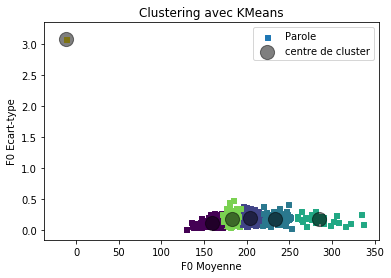

In [1083]:
#Representation Graphique Matplotlib
# Initialisation figure
fig = plt.figure()
#Construction figure
plt.scatter(npProsodie[:, 0], npProsodie[:, 1], c=y_kmeansClusterPers, s=25, cmap='viridis', marker = 's', label = 'Parole')
#plt.scatter(npProsodieNarr[:, 0], npProsodieNarr[:, 1], c=y_kmeansClusterPersNarr, s=25, cmap='viridis', marker = '^')

centers = kmeansClusterPersBuild.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label = 'centre de cluster')

#axes et legendes
#plt.ylim(-0.25, 1)
#plt.xlim(100, 400)
plt.title('Clustering avec KMeans')
plt.xlabel("F0 Moyenne")
plt.ylabel("F0 Ecart-type")
#plt.margins(0.5, 0.5)
plt.legend()
#Sauvegarde figure
fig.savefig(pwdFileImgPersClusters)

Bloc Representation par tableau

In [1084]:
#Tableau Pandas DataFrame
listColumnsDF1 = ['Pers'] 
for numCluster in range(intNbClusters) :
    listColumnsDF1.append(str('Cluster ' + str(numCluster)))
listColumnsDF1.append('Total')
print('listColumnsDF1-->', listColumnsDF1)

#DataFrame
dfPersClusters = pd.DataFrame(listPersClusters, columns = listColumnsDF1)
#Tri
dfSortedPersClus = dfPersClusters.sort_values(by = 'Total')
#Affichage
print('Nom fichier sauvegarde CSV avec type regroupement personnages et autres caracteristiques du clustering -->')
print(pwdFileMatricePersClustersCsv)
print('dfSortedPersClus-->')
print(dfSortedPersClus)

#Sauvegarde
dfPersClusters.to_csv(pwdFileMatricePersClustersCsv, sep="\t", encoding="utf-8", index=False )
dfPersClusters.to_excel(pwdFileMatricePersClustersExcel, index=False)

print('Bloc Representation par tableau : OK')

listColumnsDF1--> ['Pers', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Total']
Nom fichier sauvegarde CSV avec type regroupement personnages et autres caracteristiques du clustering -->
./ResultatNoteBook/TestBrouillon/MatTestT210BrNbClusters6_PersGroupNonNarrateur_F0_ensemble_oeuvres.csv
dfSortedPersClus-->
                               Pers  Cluster 0  Cluster 1  Cluster 2  \
41     flaubert_madamebovary. pers7          0          1          0   
42     flaubert_madamebovary. pers8          0          0          1   
46           merimee_carmen. pers14          0          0          0   
37     flaubert_madamebovary. pers3          0          0          0   
54           merimee_carmen. pers11          0          0          0   
32  chevalier_filledupirate. pers32          0          1          0   
39     flaubert_madamebovary. pers5          0          1          0   
31  chevalier_filledupirate. pers31          0          0          0   
6    ch

Traitement des donnees Tableau

In [1085]:
#Appel des fonctions de traitement
listPersClusEval = buildListEvalFromDataFrameMultiCorpus(dfSortedPersClus, intNbClusters, strNomColPers, strNomClusters, strIdTotal)
#print('listPersClusEval-->', listPersClusEval)

#Tableau Pandas DataFrame
listColumnsDF2 = ['Pers.Livre'] 
for numCluster in range(intNbClusters) :
    listColumnsDF2.append(str('Cluster ' + str(numCluster)))
listColumnsDF2.append('Total Personnage')
print('listColumnsDF2-->', listColumnsDF2)

#DataFrame
dfPersClustersIndEval = pd.DataFrame(listPersClusEval, columns = listColumnsDF2)
#Tri
dfSortedPersClusIndEval = dfPersClustersIndEval.sort_values(by = 'Total Personnage')
#Affichage
print('Nom fichier sauvegarde CSV avec indices evaluation de clustering -->')
print(pwdFileMatricePersClustersIndEvalCsv)
print('dataframe avec indices pour evaluation dfPersClusEval -->')
print(dfSortedPersClusIndEval)

#Sauvegarde
dfPersClustersIndEval.to_csv(pwdFileMatricePersClustersIndEvalCsv, sep="\t", encoding="utf-8", index=False )
dfPersClustersIndEval.to_excel(pwdFileMatricePersClustersIndEvalExcel, index=False)

print('Bloc Traitement Donnees Tableau : OK')

listColumnsDF2--> ['Pers.Livre', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Total Personnage']
Nom fichier sauvegarde CSV avec indices evaluation de clustering -->
./ResultatNoteBook/TestBrouillon/MatTestT210BrNbClusters6_PourcentRep_PersGroupNonNarrateur_F0_ensemble_oeuvres.csv
dataframe avec indices pour evaluation dfPersClusEval -->
                         Pers.Livre         Cluster 0         Cluster 1  \
41     flaubert_madamebovary. pers7        [0.0, 0.0]     [1.0, 0.0049]   
42     flaubert_madamebovary. pers8        [0.0, 0.0]        [0.0, 0.0]   
46           merimee_carmen. pers14        [0.0, 0.0]        [0.0, 0.0]   
37     flaubert_madamebovary. pers3        [0.0, 0.0]        [0.0, 0.0]   
54           merimee_carmen. pers11        [0.0, 0.0]        [0.0, 0.0]   
32  chevalier_filledupirate. pers32        [0.0, 0.0]     [1.0, 0.0049]   
39     flaubert_madamebovary. pers5        [0.0, 0.0]     [1.0, 0.0049]   
31  chevalier_filledupirat

In [1086]:
#Appel des fonctions de synthese

dictPersSupSeuil = builtDicoTamisPoidsPers(dicoPersCluPreRap, intNbClusters, intSeuilNbSeg)
print('dictPersSupSeuil-->', dictPersSupSeuil)
listPersClusEval = builtVectResumeDescripteur(dictPersSupSeuil, strKeyPrec, strKeyRap, intNbClusters, 
                                              intDimCoteFeat, strFeatureUsed, intNbChifArrondi)
print('listPersClusEval-->', listPersClusEval)
print('centers clusters -->', centers)
print('npProsodie[0]-->', npProsodie[0])
print('listPersClusters[0]-->', listPersClusters[0])
print('listLabelPers[0]-->', listLabelPers[0])


print('Bloc Synthese Donnees Tableau : OK')

dictPersSupSeuil--> {'chevalier_filledupirate. pers1': {3: 6, 1: 2, 0: 12, 2: 1, 4: 1, 'Precision': 0.06, 'Rappel': 0.55}, 'chevalier_filledupirate. pers11': {4: 4, 0: 15, 2: 1, 1: 2, 'Precision': 0.08, 'Rappel': 0.68}, 'chevalier_filledupirate. pers12': {4: 9, 0: 12, 2: 3, 1: 4, 'Precision': 0.06, 'Rappel': 0.43}, 'chevalier_filledupirate. pers10': {1: 7, 2: 3, 4: 11, 0: 7, 'Precision': 0.04, 'Rappel': 0.39}, 'chevalier_filledupirate. pers25': {4: 11, 1: 21, 2: 7, 0: 6, 3: 2, 'Precision': 0.1, 'Rappel': 0.45}, 'chevalier_filledupirate. pers26': {0: 20, 1: 4, 4: 7, 'Precision': 0.1, 'Rappel': 0.65}, 'chevalier_filledupirate. _': {1: 2, 4: 24, 0: 5, 'Precision': 0.09, 'Rappel': 0.77}, 'merimee_carmen. _': {4: 8, 1: 9, 2: 2, 0: 5, 'Precision': 0.04, 'Rappel': 0.38}, 'merimee_carmen. pers6': {0: 2, 2: 28, 4: 15, 1: 21, 3: 11, 'Precision': 0.21, 'Rappel': 0.36}, 'merimee_carmen. pers3': {4: 20, 0: 11, 1: 6, 2: 8, 'Precision': 0.07, 'Rappel': 0.44}, 'merimee_venusdille. pers1': {4: 16, 0: 1

Bloc preparation Apprentissage Supervise

Bloc Creation du corpus de descripteur feature annote complet
bloc converti en la fonction 

In [1087]:
#Creation corpus apprentissage supervise de classification
#Reinitialisation variable bloc
intCompteur = 0
#Verification taille coherentes element du corpus
print('Taille de npProsodie-->', len(npProsodie))
print('Taille de listLabelsClusters-->', len(listLabelsClusters))
print('Taille de listLabelPers-->', len(listLabelPers))
print('dicoPersClusters-->', dicoPersClusters)
#Essai Vérification
print('listLabelPers[intCompteur][intPosIdPers]--> ', listLabelPers[intCompteur][intPosIdPers])
#initialisation des variable avant la boucle
intCompteur = 0
npProsodieAnoteComplet = []

for vectSegment in npProsodie :
    #Boucle de parcours des segments, vecteur composant le corpus npProsodie
    #Creation du vecteur listVectSegAnotComplet, segment annote de label donnant la composition suivante :
    # IdSeg, npProsodie[IdSeg], listLabelsClusters[idSeg], Id de cluster majoritaire pour Pers-classe de Pers, 
    #listLabelPers avec idPers
    #Reinitialisation des variables
    listVectSegAnotComplet = []
    #Construction du vecteur listVectSegAnotComplet
    #Determination Id complet de Pers courant
    #print('blocage')
    if strTypeGroupe == 'PersGroupGrNarNonNar' :
        #Verification modele Pers Oeuvre sans espace point
        strIdCompletPersCour = listLabelPers[intCompteur][intPosIdOeuvre] + '.' + listLabelPers[intCompteur][intPosIdPers]
    else :
        #Decoupage nom oeuvre
        strNomOeuvre = listLabelPers[intCompteur][intPosIdOeuvre]
        listComposeNomOeuvre = strNomOeuvre.split(strSepIntOeuvre)
        strNomOeuvre = listComposeNomOeuvre[intPosAuteur] + strSepIntOeuvre + listComposeNomOeuvre[intPosTitreOeuvre]
        strIdCompletPersCour = strNomOeuvre + '.' + listLabelPers[intCompteur][intPosIdPers]

    #print('strIdCompletPersCour--> ', strIdCompletPersCour)
    
    #Determination du cluster majoritaire pour le Pers du segment courant
    intIdClusterMagoritaire = belongToCluster(strIdCompletPersCour, dicoPersClusters)
    #print('intIdClusterMagoritaire-->', intIdClusterMagoritaire)
    #Ajout des element constitutifs du vecteur
    listVectSegAnotComplet.append(intCompteur)
    listVectSegAnotComplet.append(vectSegment)
    listVectSegAnotComplet.append(listLabelsClusters[intCompteur])
    
    #Verification erreur bloc fonction
    #if listLabelsClusters[intCompteur] == 1 :
        #Verification > 1 classe
     #   print('Classe 1 a index-->', intCompteur)
    
    listVectSegAnotComplet.append(intIdClusterMagoritaire)
    listVectSegAnotComplet.append(listLabelPers[intCompteur])
    #Ajout du vecteur listVectSegAnotComplet au corpus npProsodieAnoteComplet et ajout pour passage boucle
    npProsodieAnoteComplet.append(listVectSegAnotComplet)
    intCompteur = intCompteur +1
    
#Verification taille et premiere ligne de npProsodieAnoteComplet
print('Taille de npProsodieAnoteComplet-->', len(npProsodieAnoteComplet))
#print('npProsodieAnoteComplet[:][2]-->', npProsodieAnoteComplet[:][2])
#print('npProsodieAnoteComplet-->', npProsodieAnoteComplet)       

#Pretraitement de sauvegade
#Tableau Pandas DataFrame
listColumnsDF04 = ['IdSeg', strFeatureUsed]
listColumnsDF04.append('Cluster Kmean')
listColumnsDF04.append('Classe Pers')
listColumnsDF04.append('Label linguistique Pers')
print('listColumnsDF04-->', listColumnsDF04)

#DataFrame
dfCorpusRes = pd.DataFrame(npProsodieAnoteComplet, columns = listColumnsDF04)

#Affichage
print('Nom fichier sauvegarde CSV avec Corpus de Resultat -->')
print(pwdFileCorpusResCsv)
print('dataframe dfCorpusRes -->')
print(dfCorpusRes)

#Sauvegarde
dfCorpusRes.to_csv(pwdFileCorpusResCsv, sep="\t", encoding="utf-8", index=False )
dfCorpusRes.to_excel(pwdFileCorpusResExcel, index=False)

print('Bloc Creation du corpus de descripteur feature annote complet : OK')

Taille de npProsodie--> 845
Taille de listLabelsClusters--> 845
Taille de listLabelPers--> 845
dicoPersClusters--> {'feval_vampire. papaSeverin': {4: 2}, 4: 18, 'chevalier_filledupirate. pers1': {3: 6, 1: 2, 0: 12, 2: 1, 4: 1}, 3: 1, 'chevalier_filledupirate. pers3': {2: 1}, 'chevalier_filledupirate. pers5': {3: 1, 1: 1}, 1: 6, 'chevalier_filledupirate. pers2': {4: 2, 2: 4, 0: 3, 1: 1}, 0: 3, 'chevalier_filledupirate. pers7': {0: 1}, 'chevalier_filledupirate. pers8': {3: 1}, 2: 6, 'chevalier_filledupirate. pers9': {4: 2, 1: 1}, 'chevalier_filledupirate. pers4': {0: 6, 1: 1}, 'chevalier_filledupirate. pers6': {0: 7, 4: 4, 2: 2}, 'chevalier_filledupirate. pers11': {4: 4, 0: 15, 2: 1, 1: 2}, 'chevalier_filledupirate. pers12': {4: 9, 0: 12, 2: 3, 1: 4}, 'chevalier_filledupirate. pers13': {4: 1, 2: 1}, 'chevalier_filledupirate. pers14': {1: 1, 4: 1}, 'chevalier_filledupirate. pers15': {0: 8, 1: 3, 4: 1}, 'chevalier_filledupirate. pers16': {0: 1, 3: 1}, 'chevalier_filledupirate. pers10': {1:

Bloc Creation du corpus de descripteur feature annote complet : OK


Bloc Creation corpus train et test pour la SVM

In [1088]:
#Fonction utilisees en annexe
#dictPersSupSeuil = builtDicoTamisPoidsPers(dicoPersCluPreRap, intNbClusters, intSeuilNbSeg)
#Reinitialisation des variables avant boucle
corpusSVM =[]
listVectCourSVM =[]
dictClasseSVM = {}
listIdClasseSVM = []
intNbClasseSVM = 0
intCompteur =0
intRapportAdaptClasse = -1

for listVectSegAnotComplet in npProsodieAnoteComplet :
    #Boucle parcours npProsodieAnoteComplet
    #Determination Id complet de Pers courant
    strIdCompletPersCour = listVectSegAnotComplet[intPosLabelPers][intPosIdOeuvre] + '. ' + listVectSegAnotComplet[intPosLabelPers][intPosIdPers]
    if strTypeGroupe == 'PersGroupGrNarNonNar' :
        #Verification modele Pers Oeuvre sans espace point
        strIdCompletPersCour = listVectSegAnotComplet[intPosLabelPers][intPosIdOeuvre] + '.' + listVectSegAnotComplet[intPosLabelPers][intPosIdPers]
    else :
        #Decoupage nom oeuvre
        strNomOeuvre = listVectSegAnotComplet[intPosLabelPers][intPosIdOeuvre]
        listComposeNomOeuvre = strNomOeuvre.split(strSepIntOeuvre)
        strNomOeuvre = listComposeNomOeuvre[intPosAuteur] + strSepIntOeuvre + listComposeNomOeuvre[intPosTitreOeuvre]
        strIdCompletPersCour = strNomOeuvre + '.' + listVectSegAnotComplet[intPosLabelPers][intPosIdPers]
    #Verification Pers courant depasse seuil personnage notable dans recit avec dictPersSupSeuil
    if strIdCompletPersCour in dictPersSupSeuil :
        #Ajout mention persoonage notable dans tableau des data de tous les segments annotes 
        listVectSegAnotComplet.append('Oui')
        #Ajout au corpus pour la SVM du vecteur nececessaire listVectCourSVM
        
        #Determination de la classe pour SVM du segment courant listVectSegAnotComplet
        if strTypeGroupe == 'PersGroupGrNarNonNar' :
            #Dans ce cas Narrateur et Non narrateur ont le meme cluster majoritaire; donc la classe est le cluster du
            #KMeans, nomme Label de Cluster qui est contenu dans la listLabelsClusters
            intIdClasseSVM =listVectSegAnotComplet[intPosLabelCluster]
        else :
            #Le cluster majoritaire du Pers est sa classe
            intIdClasseSVM = listVectSegAnotComplet[intPosClusMaj]
        
        #Reinitialisation du vecteur listVectCourSVM
        listVectCourSVM =[]
        #Composition du vecteur listVectCourSVM avec le descripteur et la classe-cluster majoritaire du Pers du segment
        listVectCourSVM.append(listVectSegAnotComplet[intPosFeatProsodie])
        listVectCourSVM.append(intIdClasseSVM)
        
        #Ajout au corpus corpusSVM
        corpusSVM.append(listVectCourSVM)
        
        #Mise a jour du dico des occurences des classes pour le classifieur SVM dans apprentissage supervise
        #Adoption de la key courante du dico des classe pour svm par la classe du segment courant
        keyClasse = intIdClasseSVM
        #Verification si presence de la classe
        if keyClasse in dictClasseSVM :
            #Mise a jour des occurences du cluster pour le personnage
            dictClasseSVM[keyClasse] +=1
        else :
            #Creation entree de la nouvelle classe pour le dico des classe
            print('Creation classe dico dictClasseSVM')
            dictClasseSVM[keyClasse] =1
    
    else :
        #Ajout mention personnage non notable
        listVectSegAnotComplet.append('Non')
    
#Creation liste des id des classes pour apprentissage supervise classifieur SVM 
listIdClasseSVM = list(dictClasseSVM.keys())
intNbClasseSVM = len(listIdClasseSVM)
#Verification si nb cluter > nb classes
if intNbClasseSVM < intNbClusters :
    #Adaptation Id Classe SVM
    try :
        #Test division par zero
        intRapportAdaptClasse = intNbClasseSVM / intNbClusters
    except :
        print('Division par 0, retour intRapportAdaptClasse = -1 ')
        intRapportAdaptClasse = -1
    #Correspondance simplifiee si garde meme nb classe que clusters avec classe vide
    intNbClasseSVM = intNbClusters

#Verification taille et premiere ligne de npProsodieAnoteComplet
print('Taille de corpusSVM-->', len(corpusSVM))
print('listIdClasseSVM-->', listIdClasseSVM)
print('Nombre de classe intNbClasseSVM-->',intNbClasseSVM)
print('corpusSVM[2]-->', corpusSVM[2])

print('Bloc Creation corpus train et test pour la SVM : OK')

Creation classe dico dictClasseSVM
Creation classe dico dictClasseSVM
Creation classe dico dictClasseSVM
Creation classe dico dictClasseSVM
Taille de corpusSVM--> 568
listIdClasseSVM--> [0, 4, 1, 2]
Nombre de classe intNbClasseSVM--> 6
corpusSVM[2]--> [array([3.3501e+02, 2.5000e-01, 1.2100e+00, 4.2000e-01]), 0]
Bloc Creation corpus train et test pour la SVM : OK


Bloc Decoupage des Donnees - Splitting Data
X : descripteur.data; y : descripteur.target - X_train; X_test; y_train; y_test 

In [1089]:
#Reinitialisation des variables avant boucle
descripteurData = []
descripteurTarget = []
for vectData in corpusSVM :
    #Boucle de split dans ls listes data et target - donnees et classes cibles
    descripteurData.append(vectData[intPosDesData])
    descripteurTarget.append(vectData[intPosDesTarget])
    
#Decoupage du dataset en set de train et set de test
X_train, X_test, y_train, y_test = train_test_split(descripteurData, descripteurTarget, random_state=0)

#print('y_train-->', y_train)
#print('y_test', y_test)

print('Bloc Decoupage Données : OK')


Bloc Decoupage Données : OK


Bloc Genaration Modele SVM

In [1090]:
#Genaation du modele
clf = svm.SVC(kernel='linear') #Kernel lineai du modele

#Entrainement du modele avec les donnees d entrainement
clf.fit(X_train, y_train)

#Prediction par le modele de la classe de Pers sur le set de test (30% du corpus des segments)
y_predict = clf.predict(X_test)

print('y_predict-->', y_predict)
print('len(y_predict)-->', len(y_predict))

print('Bloc Genaration Modele SVM : OK')




y_predict--> [1 2 4 1 1 4 1 4 4 1 1 2 4 4 2 4 1 4 1 2 4 4 1 4 4 4 4 4 4 1 4 2 1 1 4 4 1
 4 4 1 4 4 1 4 1 4 4 1 4 4 4 4 1 1 1 4 4 1 4 4 4 4 1 4 4 4 4 2 4 4 1 4 2 4
 4 2 4 4 4 1 1 1 4 4 4 1 2 1 2 4 4 4 4 1 4 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4
 4 4 4 1 1 4 1 4 1 4 4 4 1 1 4 4 4 1 4 4 4 1 1 1 4 4 4 4 4 4 4]
len(y_predict)--> 142
Bloc Genaration Modele SVM : OK


Bloc Tableau Analyse Modele SVM

In [1091]:
#Creation tableau : 
#Horizontal entete colonne : classe par y_test, issu kmeans clustering
#Verticale entete ligne : classe par y_predict, issu SVM classification
# Pour Groupe Narrateur - Non narrateur, le cluster majoritaire est le meme pour les Narrateur et les Non narrateur
# La classe des Pers est donc celle des labels de cluster par Kmeans et non le cluster majoritaire du personnage

#Reinitialisation variable bloc
intCompteur = 0
intIndexLigTabSVM = 0
intIndexColTabSVM = 0
#Variable de structure du tableau analyse du modele SVM
listTabAnalyseSVM =[[0] * intNbClasseSVM for _ in range(intNbClasseSVM)]
#Verification structure tableau et coherence taille des set
print('initialisation listTabAnalyseSVM-->', listTabAnalyseSVM)
if(len(y_test) == len(y_predict)) :
    #Si taille identique des deux set
    intTailleSetAnalyseSVM = len(y_predict)
else :
    #Taille non identique, set non comparables
    intTailleSetAnalyseSVM = -1

print('Taille des set identique pour SVM intTailleSetAnalyseSVM-->', intTailleSetAnalyseSVM)

for index in y_test :
    #Boucle de parcours de classe correcte du set de test de apprentissage
    intIndexLigTabSVM = y_predict[intCompteur]
    intIndexColTabSVM = y_test[intCompteur]
    #Remplissage cellule du tableau analyse SVM listTabAnalyseSVM
    listTabAnalyseSVM[intIndexLigTabSVM][intIndexColTabSVM] +=1
    
    #Augmention compteur
    intCompteur = intCompteur + 1
    
#Affichage Tableau Analyse SVM Effectuee
print('analyse effectuee : Liste tableau listTabAnalyseSVM-->', listTabAnalyseSVM)

#Transformation Pourcentage tableau
#Reinitialisation des variable avant boucle
listTabPourcentSVM = deepcopy(listTabAnalyseSVM)
intIndexLigTabSVM = 0
intIndexColTabSVM = 0
#Calcul proportion pour obtenir pourcentage sous forme nombre entier
floatProportPourcent = 100/intTailleSetAnalyseSVM

for ligTab in listTabAnalyseSVM :
    #Reinitialisitation index colonne
    intIndexColTabSVM = 0
    #Boucle parcours ligne de tableau
    for colTab in ligTab :
        #Boucle parcours colonnes de tableau
        #Calcul pourcentage cellule courante
        intCellTabPourcent = int(round((colTab * floatProportPourcent), 0))
        #Ajout du pourcentage dans le tableau des poucentage
        listTabPourcentSVM[intIndexLigTabSVM][intIndexColTabSVM] = intCellTabPourcent
        #Incrementation index colonnes
        intIndexColTabSVM = intIndexColTabSVM + 1
    #Incrementation index lignes
    intIndexLigTabSVM = intIndexLigTabSVM + 1
    
print('listTabPourcentSVM-->', listTabPourcentSVM)

print('Bloc Tableau Analyse Modele SVM : OK')
                           

initialisation listTabAnalyseSVM--> [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Taille des set identique pour SVM intTailleSetAnalyseSVM--> 142
analyse effectuee : Liste tableau listTabAnalyseSVM--> [[0, 0, 0, 0, 0, 0], [4, 12, 8, 0, 19, 0], [1, 4, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0], [17, 34, 9, 0, 29, 0], [0, 0, 0, 0, 0, 0]]
listTabPourcentSVM--> [[0, 0, 0, 0, 0, 0], [3, 8, 6, 0, 13, 0], [1, 3, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0], [12, 24, 6, 0, 20, 0], [0, 0, 0, 0, 0, 0]]
Bloc Tableau Analyse Modele SVM : OK


Bloc Evaluation Modele

In [1092]:
#Model Accuracy
# Justesse, exactitude ou precision de la prediction du modele appris
#Combien de fois le modele a fait une prediction correcte
accurancyModel = metrics.accuracy_score(y_test, y_predict)
print('Accuracy : ', accurancyModel)

#Pretraitement Sauvergarde
#Tableaux Pandas DataFrame segment et pourcent
listColumnsDF05 = []
listColumnsDF06 = []
for numCluster in range(intNbClusters) :
    listColumnsDF05.append(str('C' + str(numCluster)))
    listColumnsDF06.append(str('C' + str(numCluster)))
print('listColumnsDF05-->', listColumnsDF05)
print('listColumnsDF06-->', listColumnsDF06)

#Union du tableau des segment a la liste accurancy du model
#listTabAnalyseSVM.append([accurancyModel])
#Transformation

#DataFrame
#dfClassSVM = pd.DataFrame(listTabAnalyseSVM, columns = listColumnsDF05)
dfPourcentClassSVM = pd.DataFrame(listTabPourcentSVM, columns = listColumnsDF06)

#Affichage
#print('Nom fichier sauvegarde CSV avec SVM Classique -->')
#print(pwdFileMatriceClassSvmCsv)
print('Nom fichier sauvegarde CSV avec Pourcent SVM Classique -->')
print(pwdFileMatricePourcentClassSvmCsv)
#print('dataframe dfClassSVM -->')
#print(dfClassSVM)
print('dataframe dfPourcentClassSVM -->')
print(dfPourcentClassSVM)

#Sauvegarde
#dfClassSVM.to_csv(pwdFileMatriceClassSvmCsv, sep="\t", encoding="utf-8", index=False )
dfPourcentClassSVM.to_csv(pwdFileMatricePourcentClassSvmCsv, sep="\t", encoding="utf-8", index=False )
#dfPersClustersIndEval.to_excel(pwdFileMatricePersClustersIndEvalExcel, index=False)

print('Bloc Evaluation Modele : OK')

Accuracy :  0.323943661971831
listColumnsDF05--> ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
listColumnsDF06--> ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
Nom fichier sauvegarde CSV avec Pourcent SVM Classique -->
./ResultatNoteBook/TestBrouillon/TabClassSVMEnPourcent6_PourcentRep_PersGroupNonNarrateur_F0_ensemble_oeuvres.csv
dataframe dfPourcentClassSVM -->
   C0  C1  C2  C3  C4  C5
0   0   0   0   0   0   0
1   3   8   6   0  13   0
2   1   3   4   0   0   0
3   0   0   0   0   0   0
4  12  24   6   0  20   0
5   0   0   0   0   0   0
Bloc Evaluation Modele : OK


Bloc Cross-Validation SVM

Bloc Entrainement en Cross Validation et Scoring

In [1093]:
#Entrainements du modele en cross validation et evalution par score
scores = cross_val_score(clf, descripteurData, descripteurTarget)
print('Cross-validation scores: {}'.format(scores))

#Prediction du modele entrainer en cross validation
predictions = cross_val_predict(clf, descripteurData, descripteurTarget)

print('predictions-->', predictions)
print('len(predictions)', len(predictions))

print('Bloc Entrainement en Cross Validation et Scoring : OK')

Cross-validation scores: [0.51832461 0.27894737 0.36898396]
predictions--> [2 2 2 2 2 4 4 2 0 0 1 4 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 4 1 1
 1 4 1 4 1 4 1 1 4 4 0 1 0 1 4 1 4 1 4 0 0 4 0 4 1 0 4 0 0 4 0 4 1 4 4 4 1
 4 4 4 4 1 4 4 4 1 4 1 4 4 0 1 2 2 4 4 4 4 1 4 0 1 0 4 4 4 1 0 1 4 4 4 4 4
 4 4 4 4 4 0 0 4 0 1 4 4 1 1 4 1 0 1 4 4 4 1 4 4 4 4 4 4 4 0 0 1 1 4 4 1 0
 2 1 4 4 0 4 4 4 4 4 4 4 1 4 4 4 1 4 1 4 4 4 1 4 4 4 4 4 4 4 4 4 1 1 4 4 4
 4 4 4 4 1 4 4 4 1 1 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 1 1 1 4 4 1 1 4 4 4 0
 4 1 1 4 4 0 0 4 4 4 4 0 1 1 4 4 2 2 4 2 4 2 4 2 2 4 4 2 2 1 1 0 2 1 1 4 4
 4 4 1 1 1 2 2 4 1 4 1 4 4 4 1 1 4 4 1 1 1 1 1 4 4 1 1 1 1 0 4 1 1 4 4 4 1
 1 4 1 1 1 1 1 1 1 0 1 2 2 4 0 0 4 4 4 1 1 1 1 4 2 2 4 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 1 1 1 1 1 1 4 4 1 0 1 4 4 4 4 1 1 2 4 4 4 4 4 4 4 4 4 4 1 1 4 4 0
 4 4 4 4 4 4 4 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 0
 0 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 1 1 1 4 4 4 4 0 0 0 0 4 4 4 4 4 1
 1 1 4 4 4 1 1 4 4 4 1 4 

Bloc Tableau Analyse Modele SVM Entrainee par Cross-Validation

In [1094]:
#Creation tableau : 
#Horizontal entete colonne : classe par descripteurTarget, issu kmeans clustering
#Verticale entete ligne : classe par predictions, issu SVM classification
# Pour Groupe Narrateur - Non narrateur, le cluster majoritaire est le meme pour les Narrateur et les Non narrateur
# La classe des Pers est donc celle des labels de cluster par Kmeans et non le cluster majoritaire du personnage

#Reinitialisation variable bloc
intCompteur = 0
intIndexLigTabSVM = 0
intIndexColTabSVM = 0
#Variable de structure du tableau analyse du modele SVM

listTabAnalyseCrossValSVM =[[0] * intNbClasseSVM for _ in range(intNbClasseSVM)]
#Verification structure tableau et coherence taille des set
print('initialisation listTabAnalyseCrossValSVM-->', listTabAnalyseCrossValSVM)
if(len(descripteurTarget) == len(predictions)) :
    #Si taille identique des deux set
    intTailleSetAnalyseCossValSVM = len(predictions)
else :
    #Taille non identique, set non comparables
    print('set non comparable')
    intTailleSetAnalyseCossValSVM = -1

print('Taille des set identique pour SVM intTailleSetAnalyseCossValSVM-->', intTailleSetAnalyseCossValSVM)
#print('listTabAnalyseCrossValSVM-->', listTabAnalyseCrossValSVM)

for index in descripteurTarget :
    #Boucle de parcours de classe correcte du set de test de apprentissage
    intIndexLigTabSVM = predictions[intCompteur]
    intIndexColTabSVM = descripteurTarget[intCompteur]
    #Remplissage cellule du tableau analyse SVM listTabAnalyseSVM
    listTabAnalyseCrossValSVM[intIndexLigTabSVM][intIndexColTabSVM] +=1
    
    #Verification du bloc fonction
    #print('listTabAnalyseCrossValSVM-->', listTabAnalyseCrossValSVM)
    
    #Augmention compteur
    intCompteur = intCompteur + 1

print('intCompteur-->', intCompteur)
#Affichage Tableau Analyse SVM Effectuee
print('analyse effectuee : Liste tableau cross Validation listTabAnalyseCrossValSVM-->', listTabAnalyseCrossValSVM)

#Transformation Pourcentage tableau
#Reinitialisation des variable avant boucle
listTabPourcentCrossValSVM = deepcopy(listTabAnalyseCrossValSVM)
intIndexLigTabSVM = 0
intIndexColTabSVM = 0
#Calcul proportion pour obtenir pourcentage sous forme nombre entier
floatProportPourcent = 100/intTailleSetAnalyseCossValSVM

for ligTab in listTabAnalyseCrossValSVM :
    
    #Reinitialisitation index colonne
    intIndexColTabSVM = 0
    #Boucle parcours ligne de tableau
    for colTab in ligTab :
        #Boucle parcours colonnes de tableau
        #Calcul pourcentage cellule courante
        intCellTabPourcent = int(round((colTab * floatProportPourcent), 0))
        #Ajout du pourcentage dans le tableau des poucentage
        listTabPourcentCrossValSVM[intIndexLigTabSVM][intIndexColTabSVM] = intCellTabPourcent
        #Incrementation index colonnes
        intIndexColTabSVM = intIndexColTabSVM + 1
    #Incrementation index lignes
    intIndexLigTabSVM = intIndexLigTabSVM + 1
    
print('listTabPourcentCrossValSVM-->', listTabPourcentCrossValSVM)

#Pretraitement de sauvegarde
#Tableaux Pandas DataFrame segment et pourcent
listColumnsDF07 = []
listColumnsDF08 = []
for numCluster in range(intNbClusters) :
    listColumnsDF07.append(str('C' + str(numCluster)))
    listColumnsDF08.append(str('C' + str(numCluster)))
print('listColumnsDF07-->', listColumnsDF07)
print('listColumnsDF08-->', listColumnsDF08)

#Union du tableau des segment a la liste accurancy du model
listTabAnalyseCrossValSVM.append(scores)

#DataFrame
#dfCrossValSVM = pd.DataFrame(listTabAnalyseCrossValSVM, columns = listColumnsDF07)
dfPourcentCrossValSVM = pd.DataFrame(listTabPourcentCrossValSVM, columns = listColumnsDF08)

#Affichage
#print('Nom fichier sauvegarde CSV avec SVM Cross-Validation -->')
#print(pwdFileMatriceCrossValSvmCsv)
#print('Nom fichier sauvegarde CSV avec Pourcent SVM Cross-Validation -->')
#print(pwdFileMatricePourcentCrossValSvmCsv)
#print('dataframe dfCrossValSVM -->')
#print(dfCrossValSVM)
print('dataframe dfPourcentCrossValSVM -->')
print(dfPourcentCrossValSVM)

#Sauvegarde
#dfCrossValSVM.to_csv(pwdFileMatriceCrossValSvmCsv, sep="\t", encoding="utf-8", index=False )
dfPourcentCrossValSVM.to_csv(pwdFileMatricePourcentCrossValSvmCsv, sep="\t", encoding="utf-8", index=False )
#dfPersClustersIndEval.to_excel(pwdFileMatricePersClustersIndEvalExcel, index=False)

print('Bloc Tableau Analyse Modele SVM Entrainee par Cross-Validation : OK')
print('Bloc Cross Validation SVM : OK')

initialisation listTabAnalyseCrossValSVM--> [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Taille des set identique pour SVM intTailleSetAnalyseCossValSVM--> 568
intCompteur--> 568
analyse effectuee : Liste tableau cross Validation listTabAnalyseCrossValSVM--> [[30, 15, 2, 0, 19, 0], [17, 54, 35, 0, 60, 0], [6, 7, 16, 0, 0, 0], [0, 0, 0, 0, 0, 0], [50, 112, 24, 0, 121, 0], [0, 0, 0, 0, 0, 0]]
listTabPourcentCrossValSVM--> [[5, 3, 0, 0, 3, 0], [3, 10, 6, 0, 11, 0], [1, 1, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0], [9, 20, 4, 0, 21, 0], [0, 0, 0, 0, 0, 0]]
listColumnsDF07--> ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
listColumnsDF08--> ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
dataframe dfPourcentCrossValSVM -->
   C0  C1  C2  C3  C4  C5
0   5   3   0   0   3   0
1   3  10   6   0  11   0
2   1   1   3   0   0   0
3   0   0   0   0   0   0
4   9  20   4   0  21   0
5   0   0   0   0   0   0
Bloc Tableau Analyse Modele SVM Entrainee par

In [1095]:
#Bloc ExpCours

Bloc Fermeture Fichier

In [1096]:
#Instruction de fermeture
try :
    fo.close()
except :
    print('Ouverture individuelle non valide -> ouverture ensemble de fichiers')
    
print('Bloc Fermeture Fichier : OK')

Ouverture individuelle non valide -> ouverture ensemble de fichiers
Bloc Fermeture Fichier : OK


Bloc Elsa


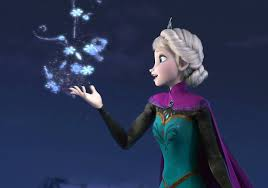

<IPython.core.display.Image object>
Bloc Elsa : OK


In [1097]:
imageElsa=ImgPIL.open("./ressources/imagesElsa001.jpeg")
imageElsa.show()
imageV02Elsa=Image("./ressources/imagesElsa001.jpeg")
display(imageV02Elsa)
print(imageV02Elsa)

print('Bloc Elsa : OK')